In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
from scipy.stats import boxcox
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import DataFrame
from pandas import Grouper
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')
!pip install dataprep
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [ ]:
# Loading dataset
from google.colab import drive
drive.mount('/content/drive/')
df=pd.read_csv('Airlines.csv')
df

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Month  Passengers
0   Jan-95         112
1   Feb-95         118
2   Mar-95         132
3   Apr-95         129
4   May-95         121
..     ...         ...
91  Aug-02         405
92  Sep-02         355
93  Oct-02         306
94  Nov-02         271
95  Dec-02         306

[96 rows x 2 columns]

In [ ]:
#Data Exploration
df.isnull().any()

Month         False
Passengers    False
dtype: bool

In [ ]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

<Axes: >

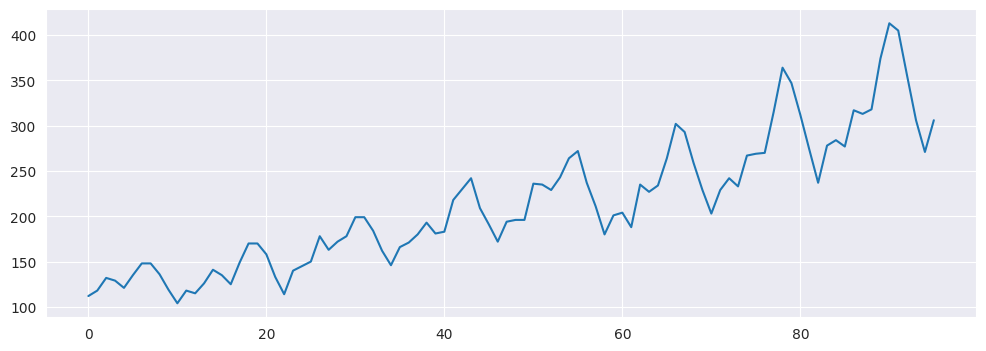

In [ ]:
df.Passengers.plot(figsize=(12,4))

In [ ]:
#Descriptive Analysis
df.shape

(96, 2)

In [ ]:
#Checking the data types
df.dtypes

Month         object
Passengers     int64
dtype: object

In [ ]:
#Unique values for every feature
df.nunique()

Month         96
Passengers    80
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
df[df.duplicated()].shape

(0, 2)

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [Month, Passengers]
Index: []

In [ ]:
df.describe()

Passengers
count   96.000000
mean   213.708333
std     71.918216
min    104.000000
25%    156.000000
50%    200.000000
75%    264.750000
max    413.000000

In [ ]:
#Feature Engineering
#Renaming the Month column into Date
df.rename({'Month':'Date'},axis=1, inplace=True)

In [ ]:
import pandas as pd

df1 = df.copy()
# Filter out rows with invalid dates like 'Jan-00', 'Feb-00', etc.
df1 = df1[~df1['Date'].str.contains('-00')]

# Convert the 'Date' column to datetime, handling potential errors
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

# Remove rows with NaT (Not a Time) values resulting from conversion errors
df1 = df1.dropna(subset=['Date'])

df1.set_index('Date',inplace=True)
df1.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999],
           dtype='int64', name='Date')

In [ ]:
df1.head()

Passengers
Date                  
1995-01-01         112
1995-02-01         118
1995-03-01         132
1995-04-01         129
1995-05-01         121

In [ ]:
# Separating Month and Year into Separate Column for Visualization and removing meaningful insight of the data
df["Date"] = pd.to_datetime(df.Date,format="%b-%y")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y") # year extraction
df.head(10)

Date  Passengers month  year
0 1995-01-01         112   Jan  1995
1 1995-02-01         118   Feb  1995
2 1995-03-01         132   Mar  1995
3 1995-04-01         129   Apr  1995
4 1995-05-01         121   May  1995
5 1995-06-01         135   Jun  1995
6 1995-07-01         148   Jul  1995
7 1995-08-01         148   Aug  1995
8 1995-09-01         136   Sep  1995
9 1995-10-01         119   Oct  1995

<Axes: xlabel='month', ylabel='year'>

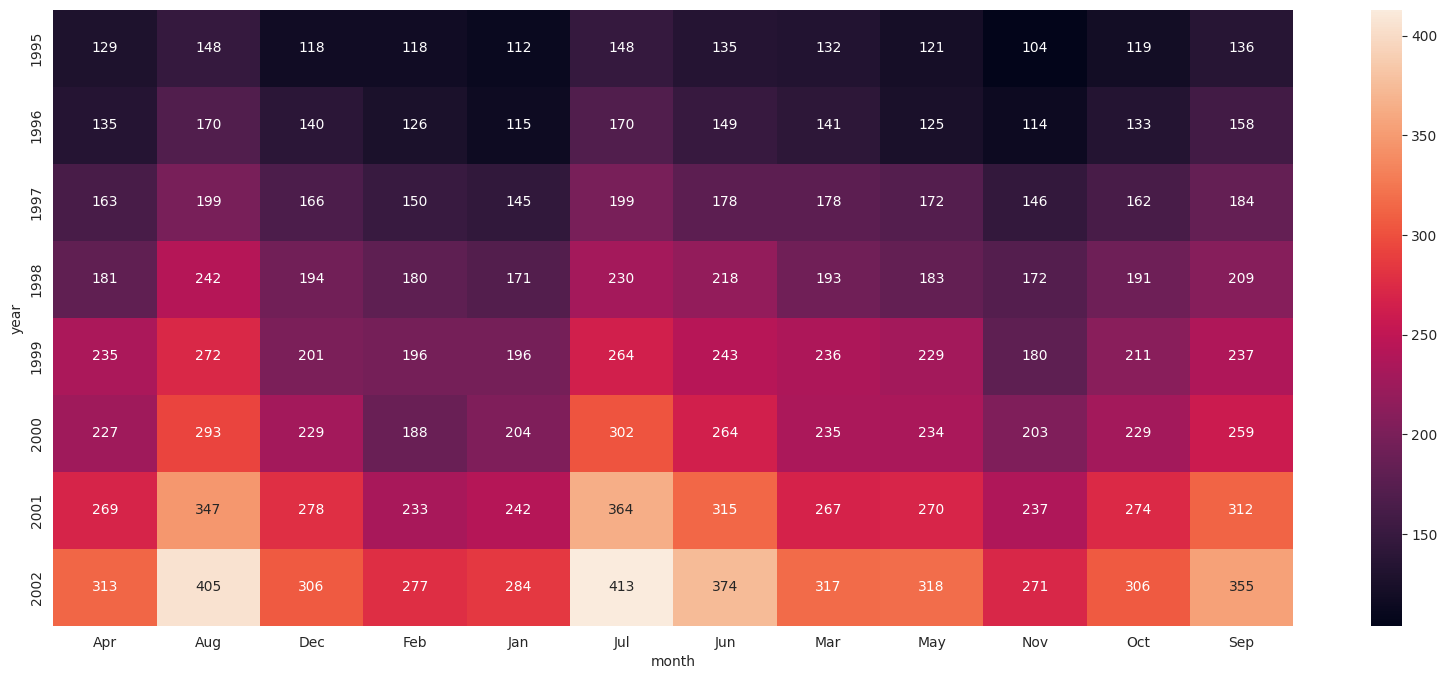

In [ ]:
plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

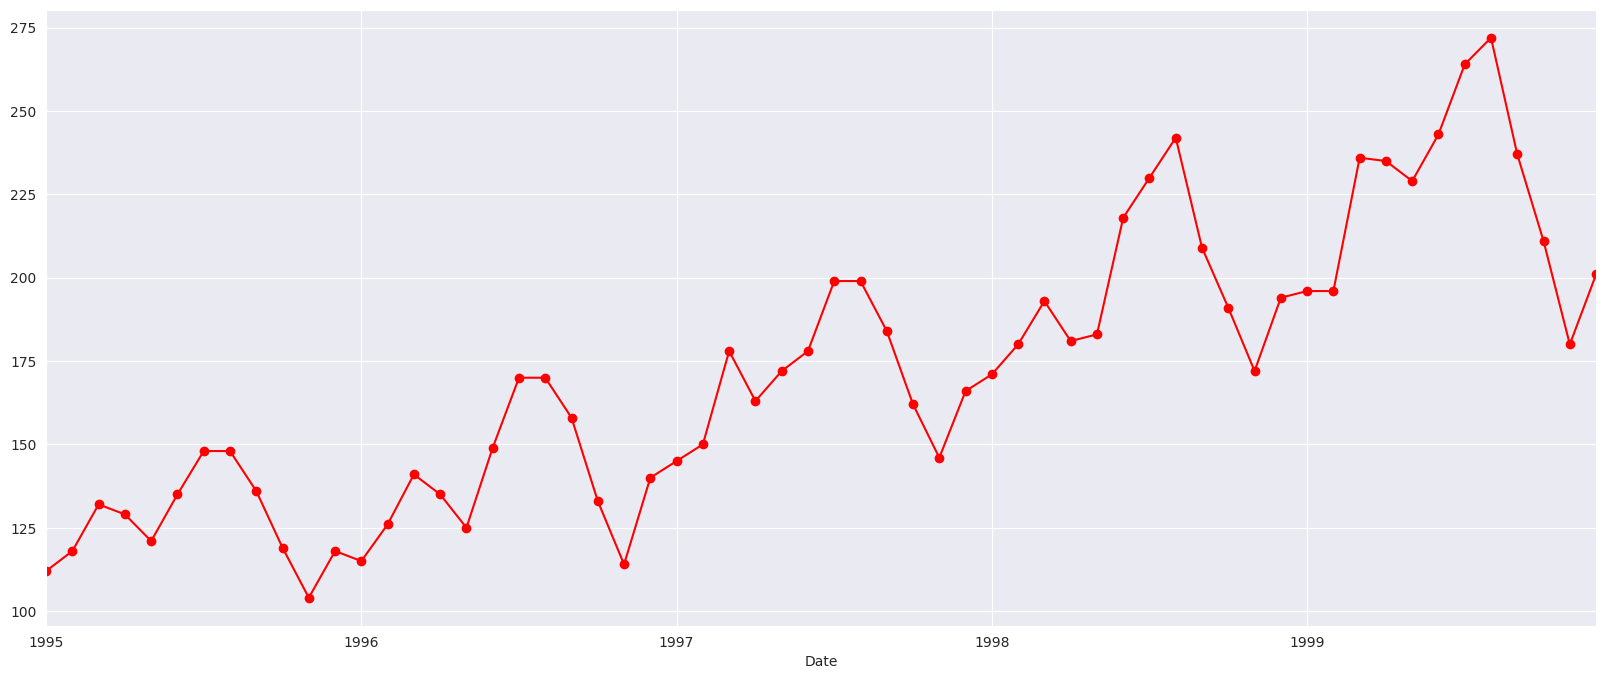

In [ ]:
#Line plot
df1['Passengers'].plot(figsize=(20, 8),color='red',marker='o')
plt.show()

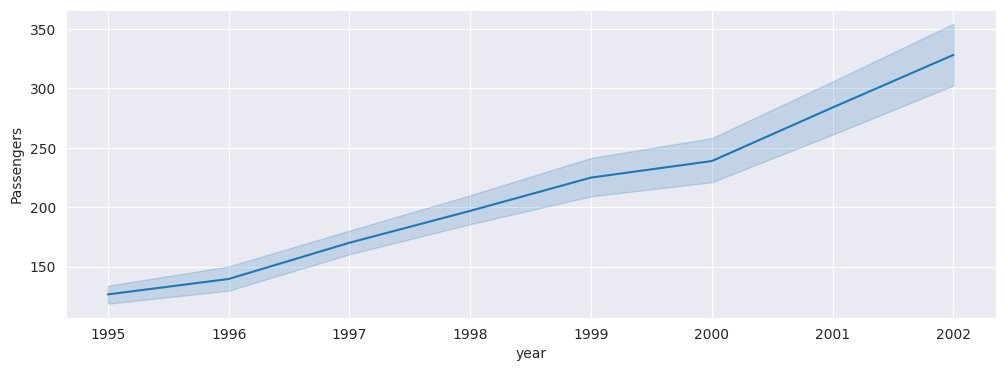

In [ ]:
#Yearly Passenger Analysis
plt.figure(figsize=(12,4))
sns.lineplot(x="year",y="Passengers",data=df)
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

<Axes: xlabel='year', ylabel='Passengers'>

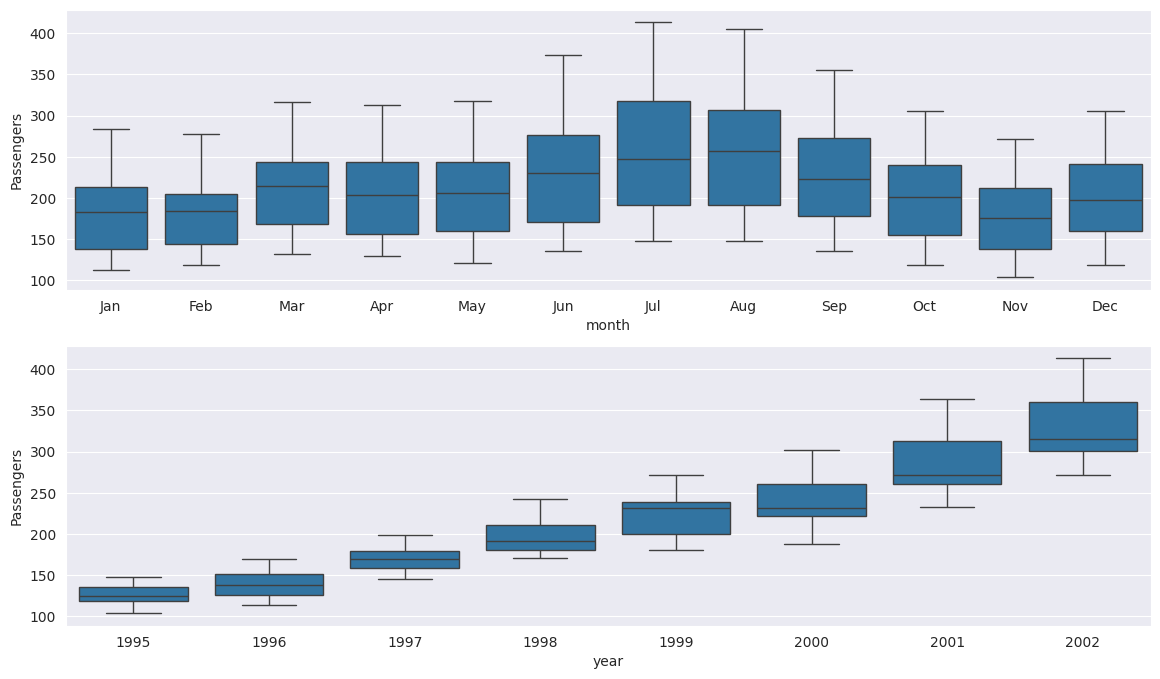

In [ ]:
#Box Plot of Each Year by Monthly Intervals
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=df)

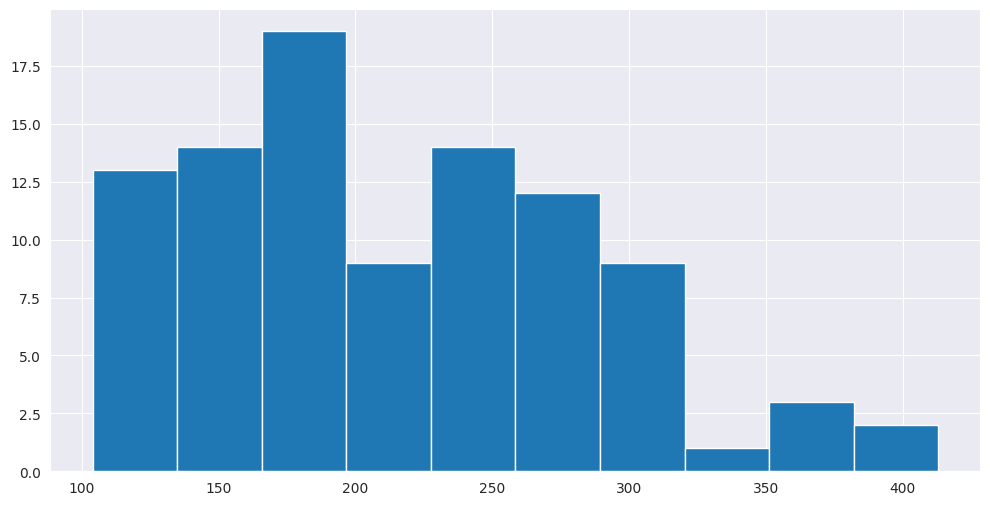

In [ ]:
#Histogram and Density Plots
df.Passengers.hist(figsize=(12,6))
plt.show()

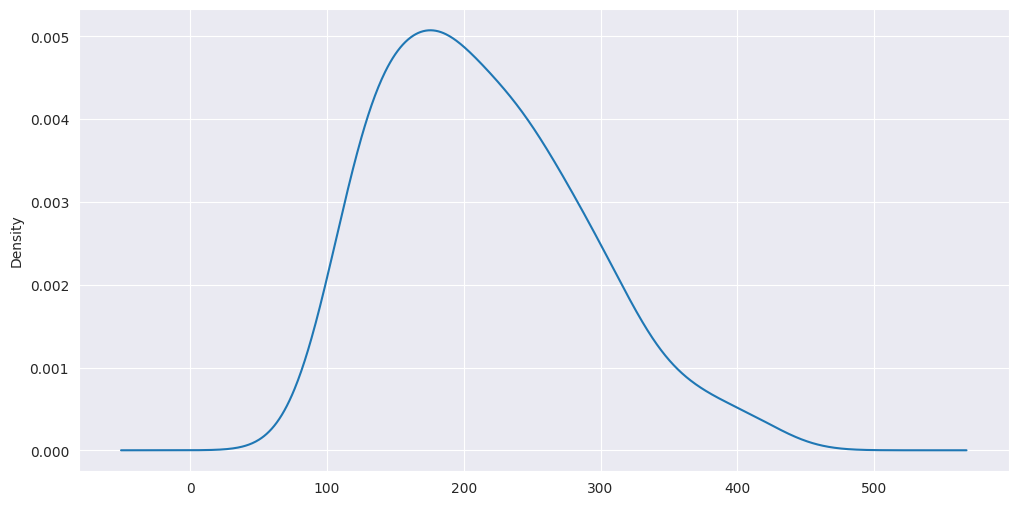

In [ ]:
# create a density plot
df.Passengers.plot(kind='kde', figsize=(12,6))
plt.show()

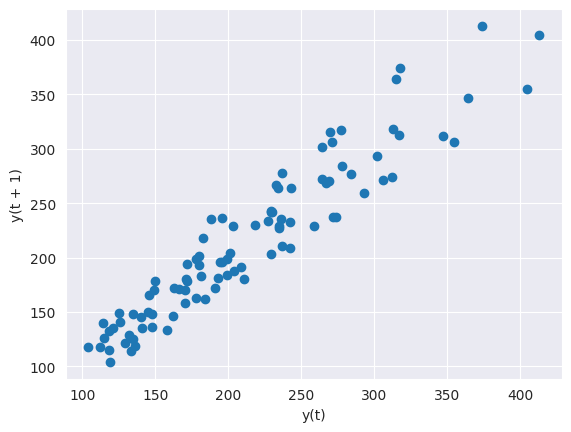

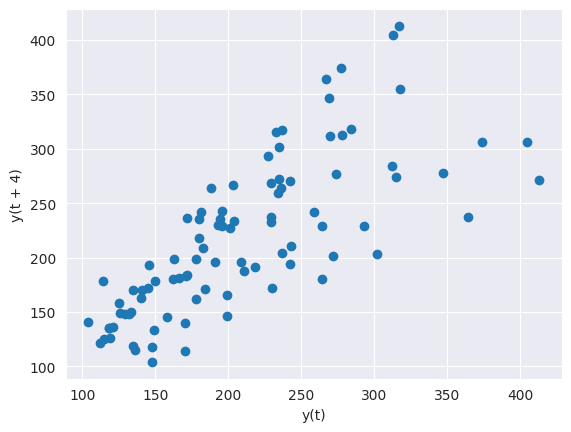

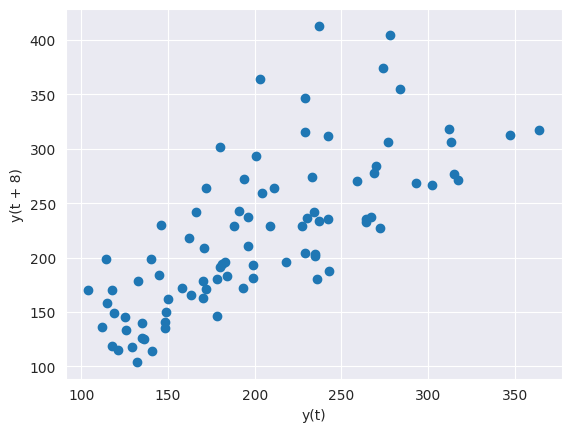

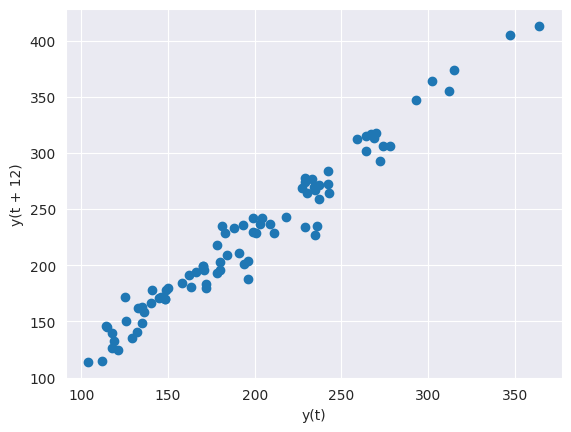

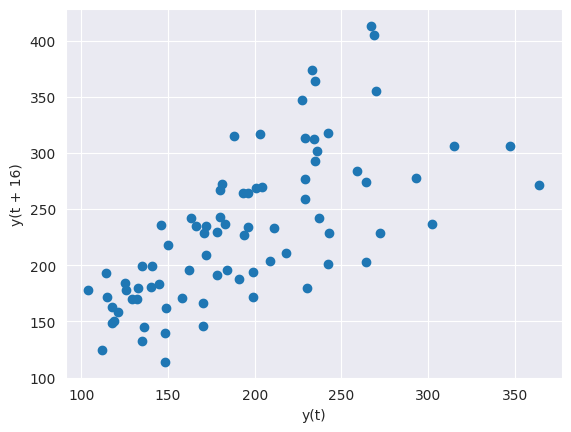

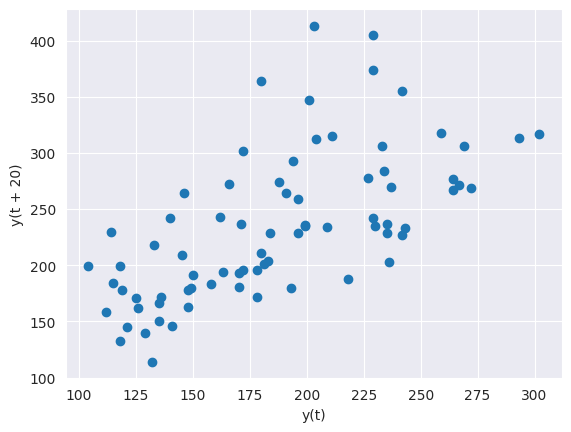

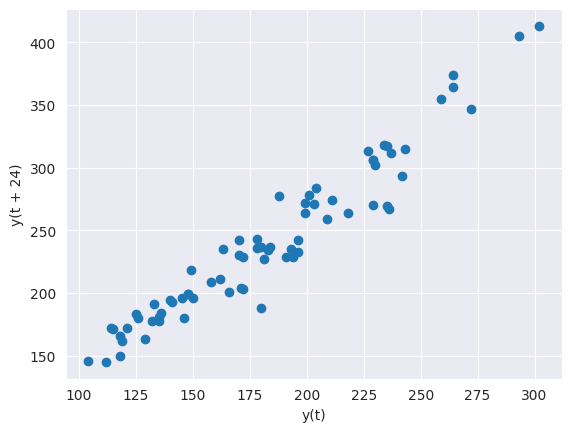

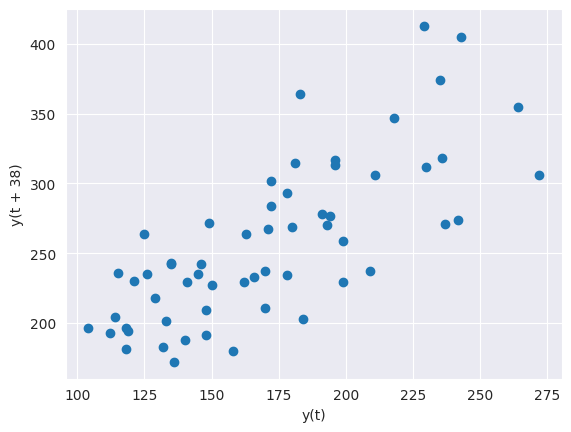

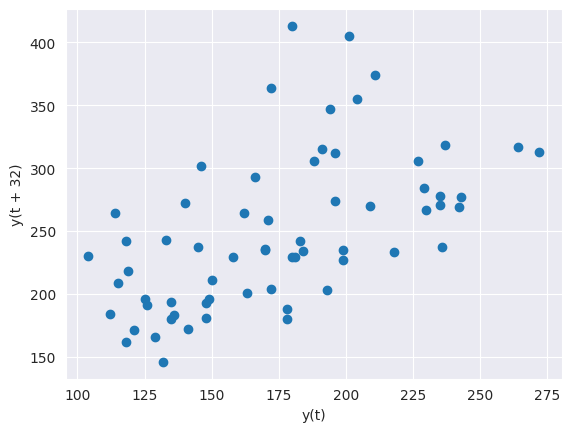

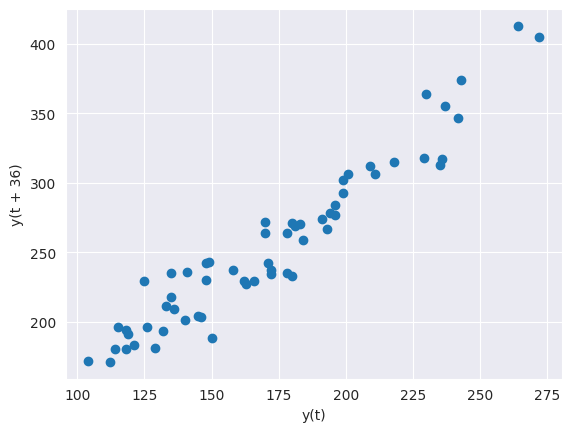

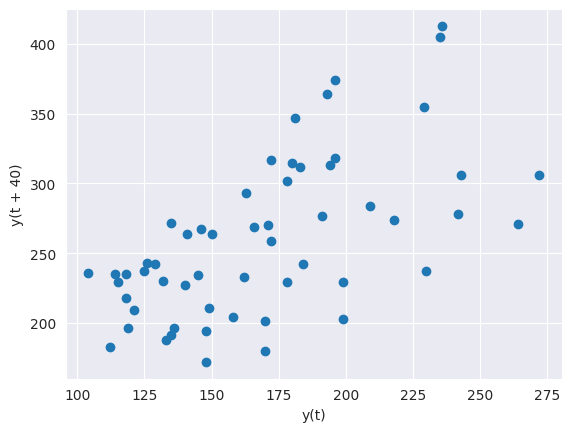

In [ ]:
# scatter plot
for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    #plt.figure(figsize=(12,8))
    lag_plot(df.Passengers, lag=i)
    plt.show()

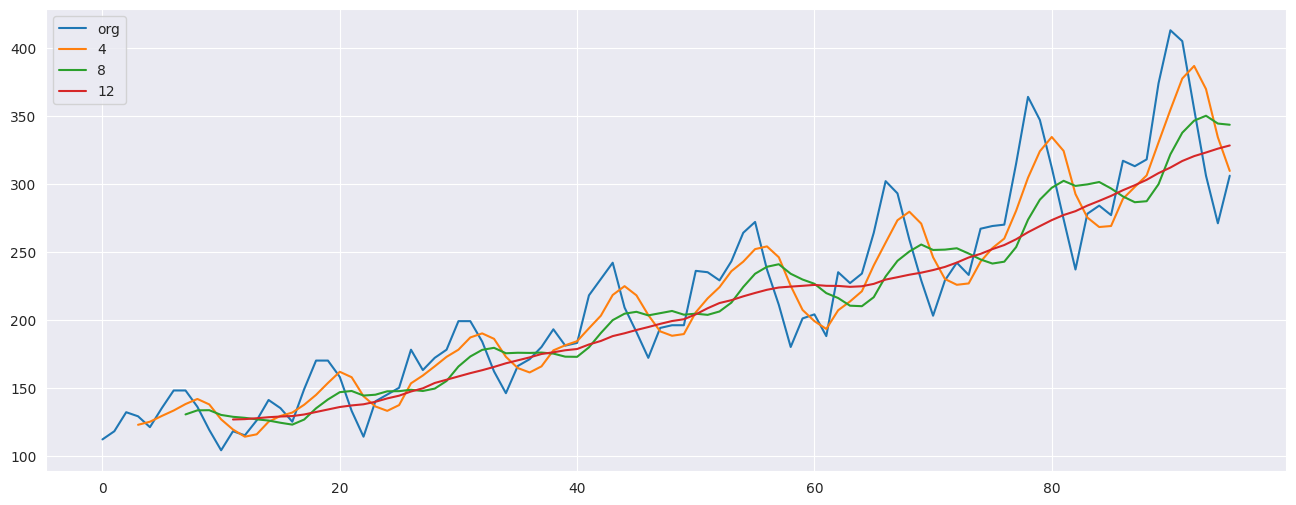

In [ ]:
#Moving Average
plt.figure(figsize=(16,6))
df.Passengers.plot(label="org")
for i in range(4,13,4):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

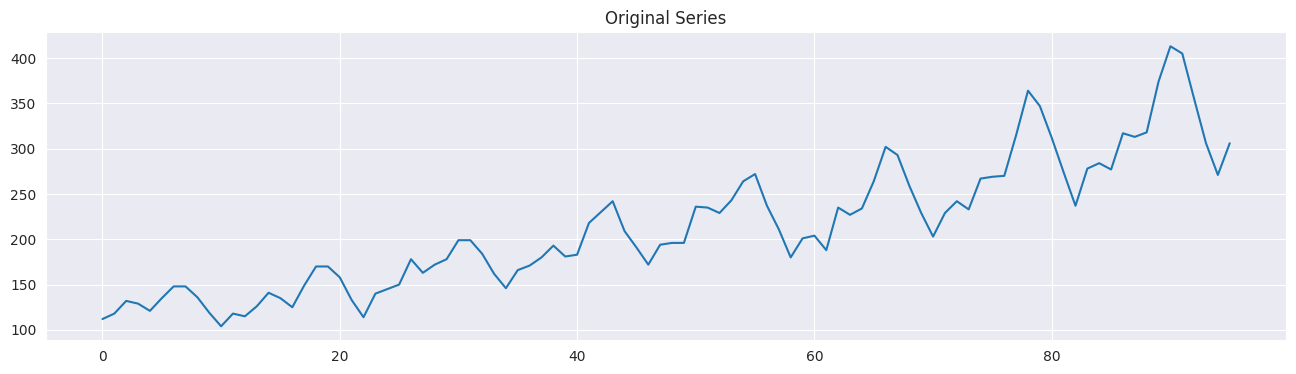

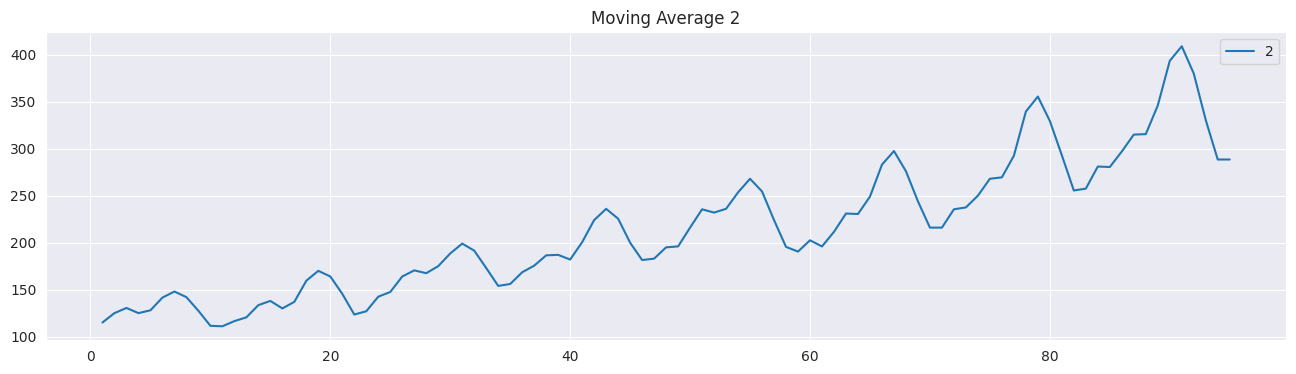

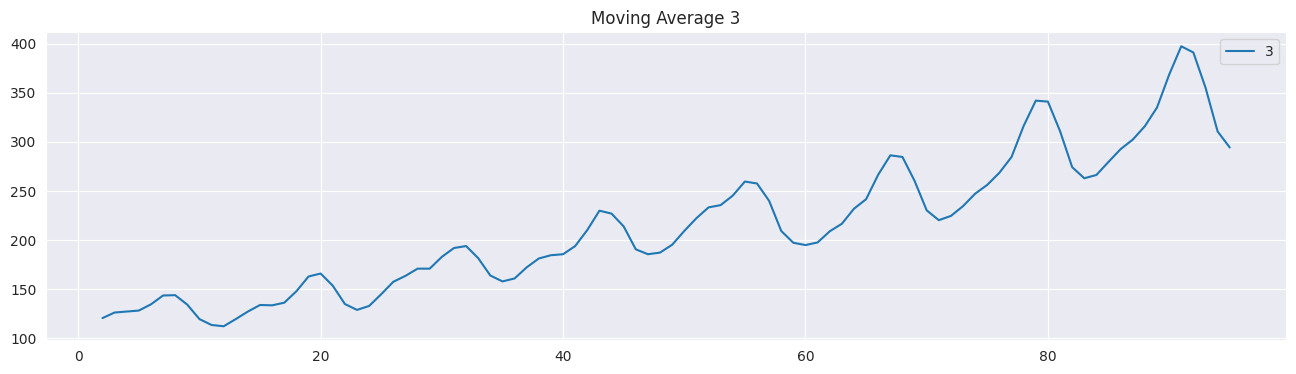

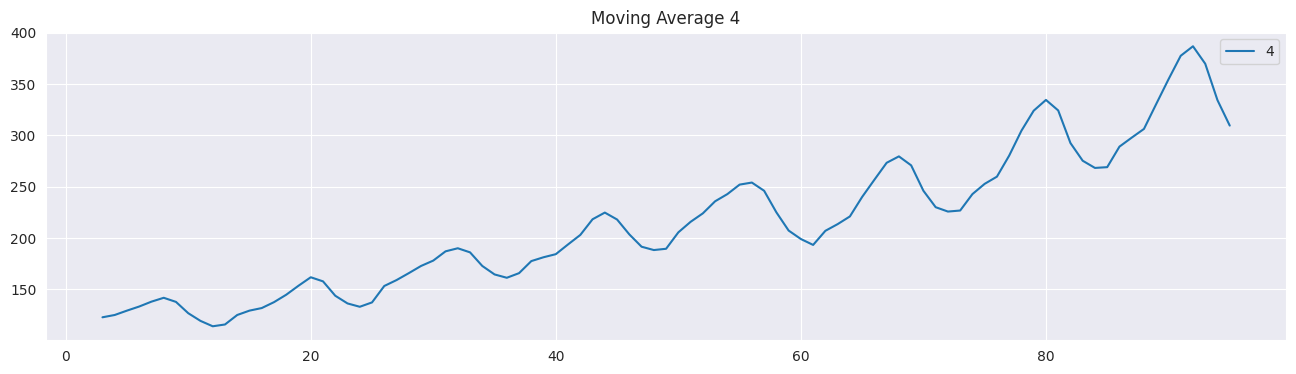

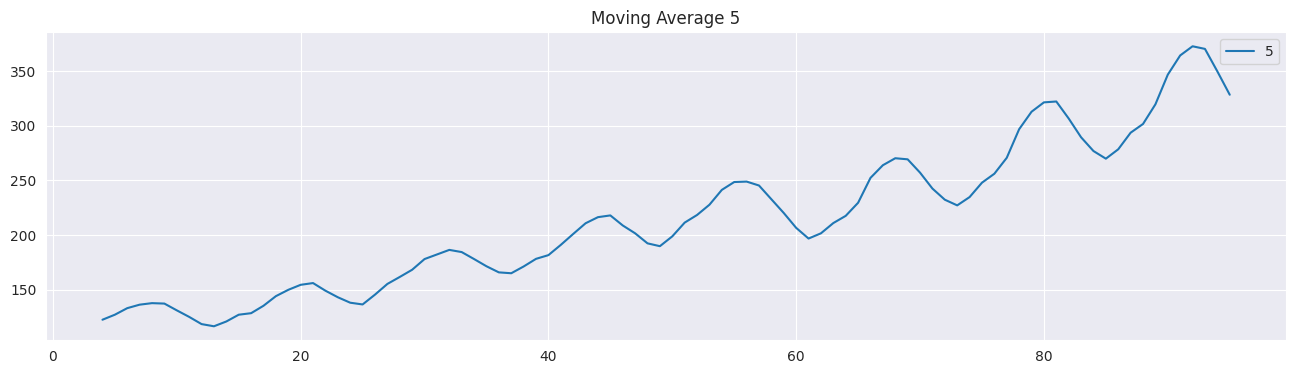

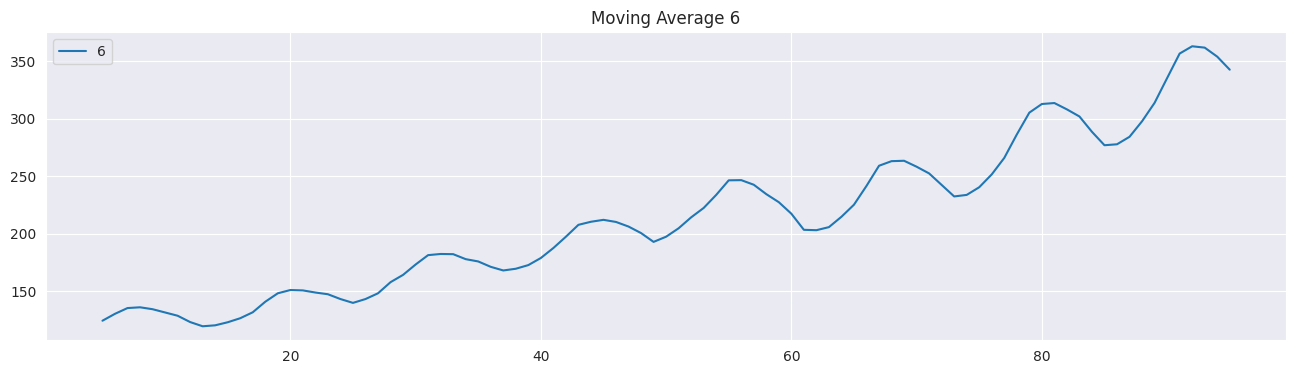

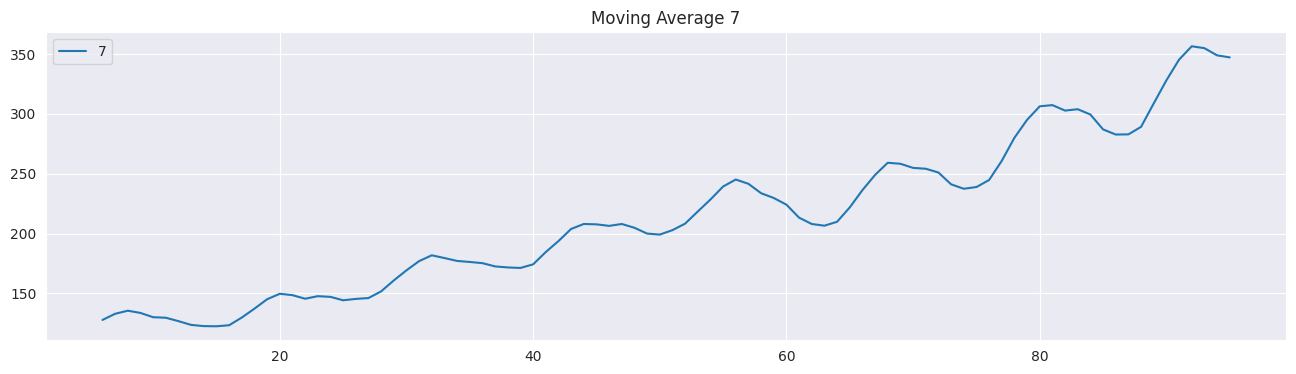

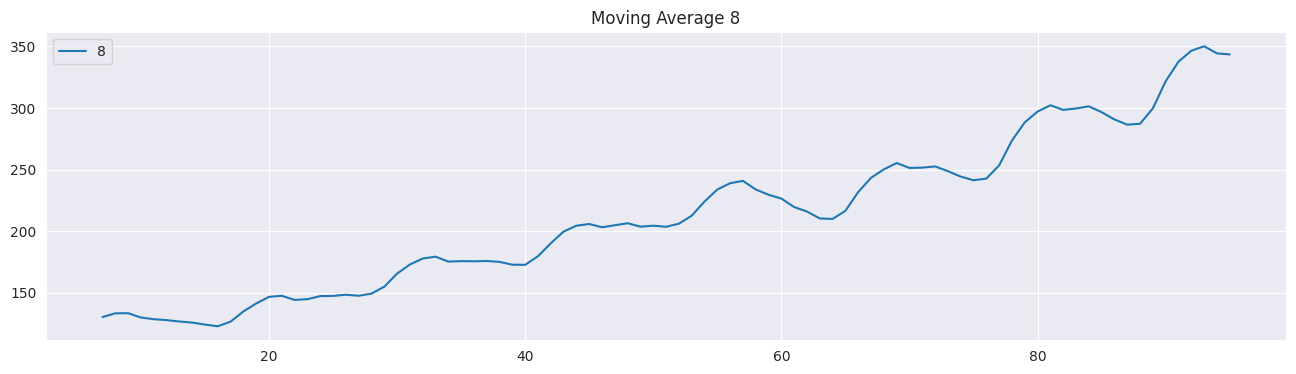

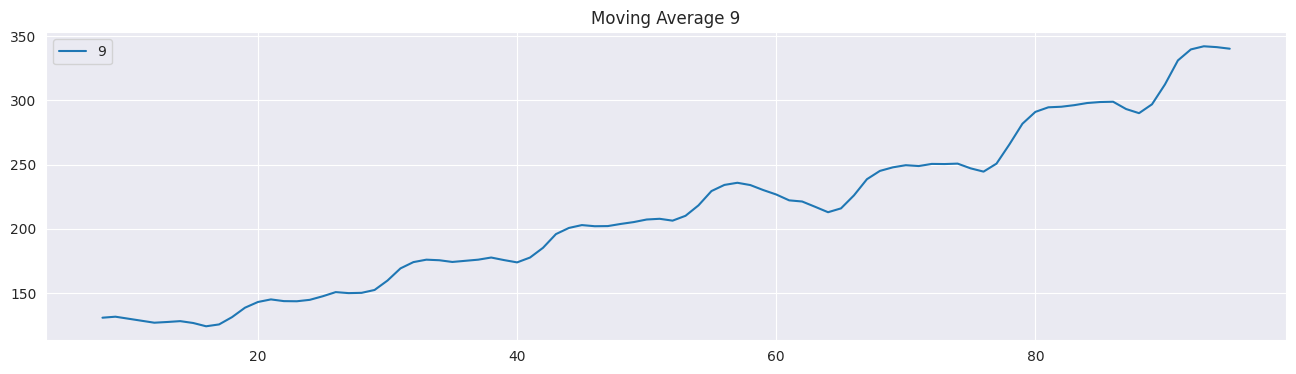

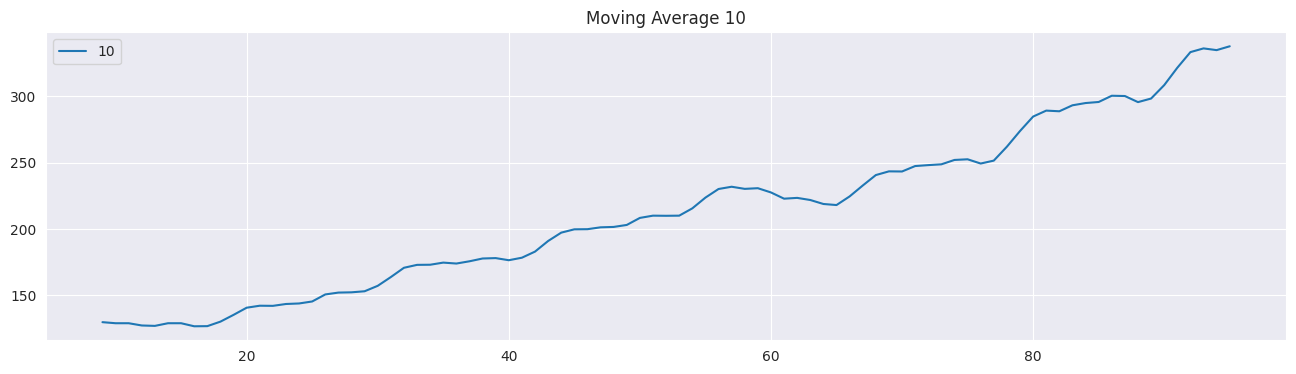

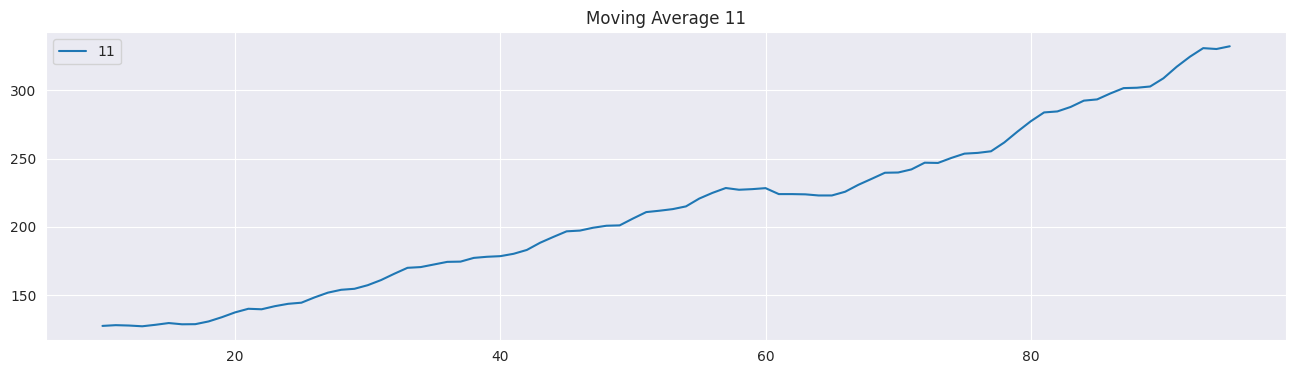

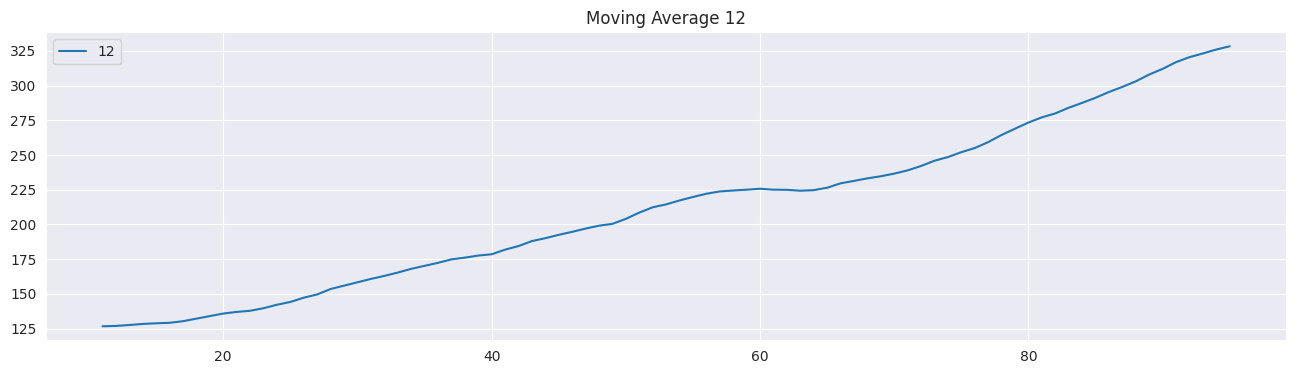

In [ ]:
plt.figure(figsize=(16,4))
df.Passengers.plot(label="org")
plt.title("Original Series")
for i in range(2,13):
    plt.figure(figsize=(16,4))
    df["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

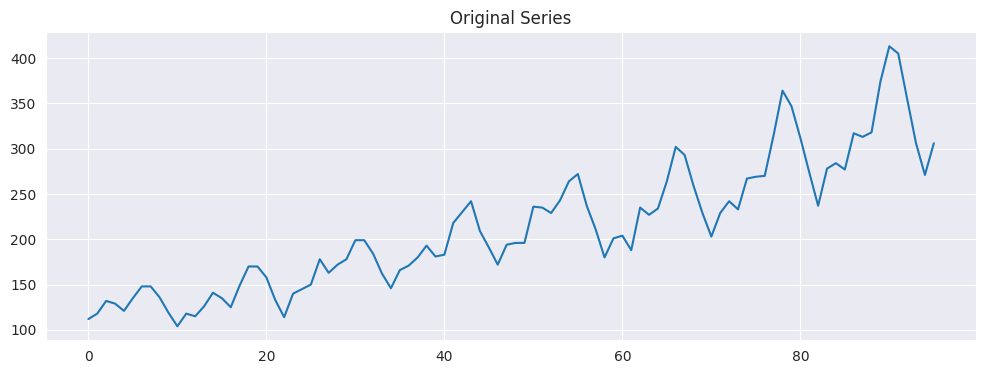

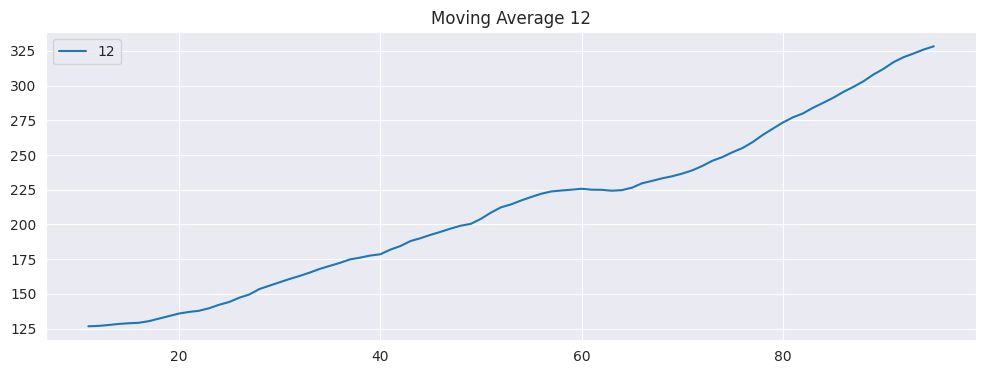

In [ ]:
plt.figure(figsize=(12,4))
df.Passengers.plot(label="org")
plt.title("Original Series")
plt.figure(figsize=(12,4))
df["Passengers"].rolling(12).mean().plot(label=str(12))
plt.title("Moving Average "+str(12))
plt.legend(loc='best')
plt.show()

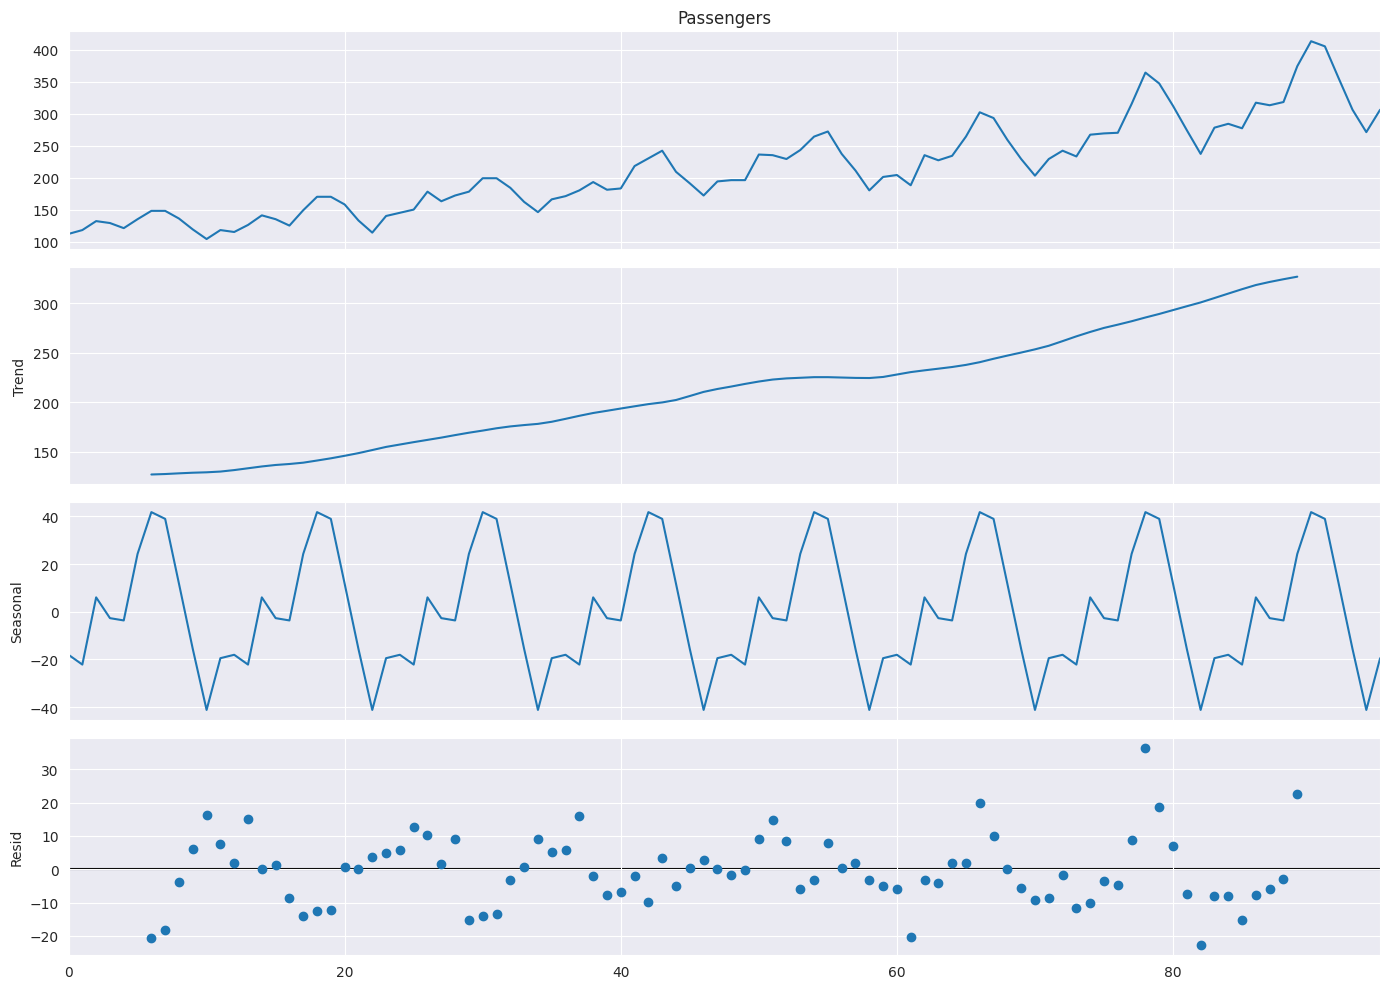

In [ ]:
#Time series decomposition plot
decompose_ts_add = seasonal_decompose(df.Passengers,period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

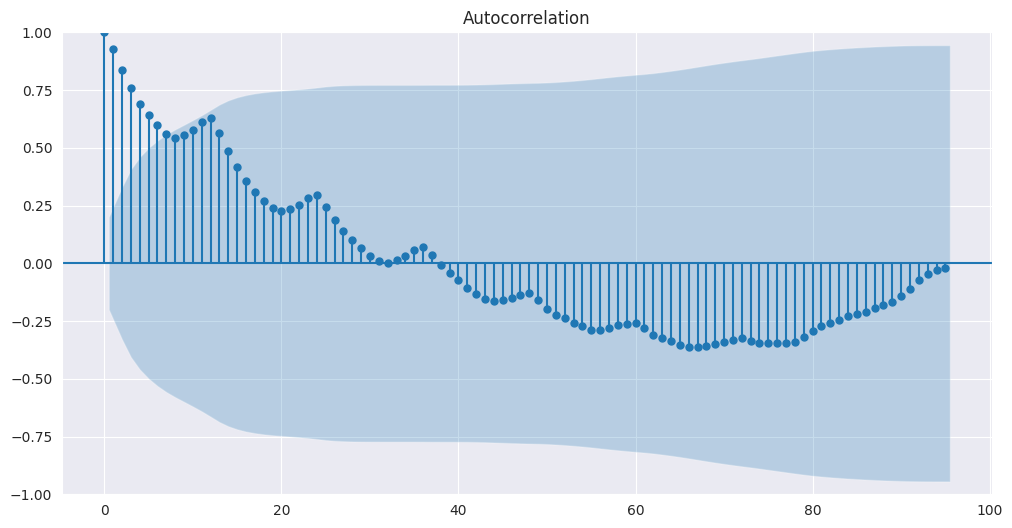

In [ ]:
#ACF plots and PACF plots
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,6))
    tsa_plots.plot_acf(df.Passengers,lags=95)
    plt.show()

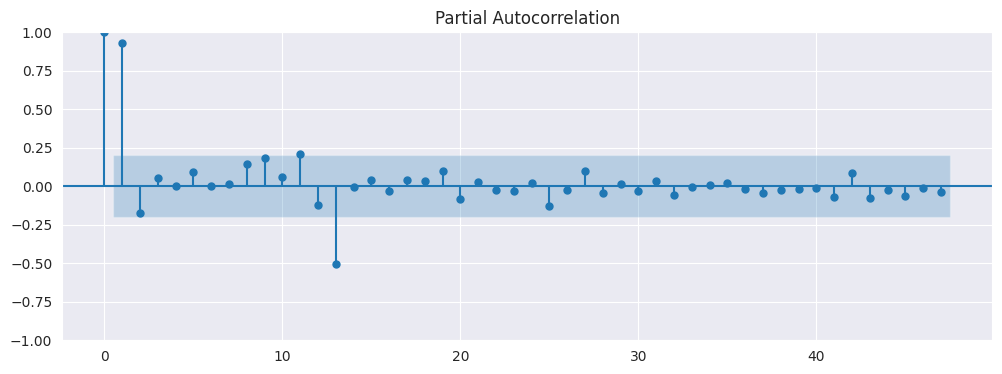

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_pacf(df.Passengers,lags=47)
    plt.show()

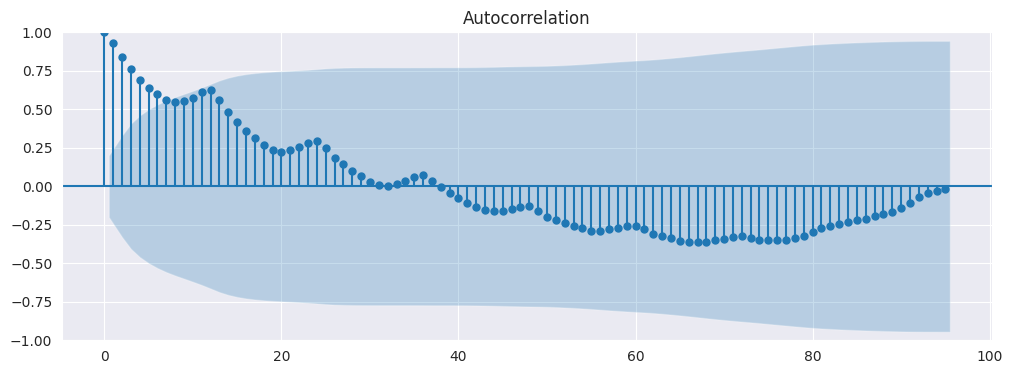

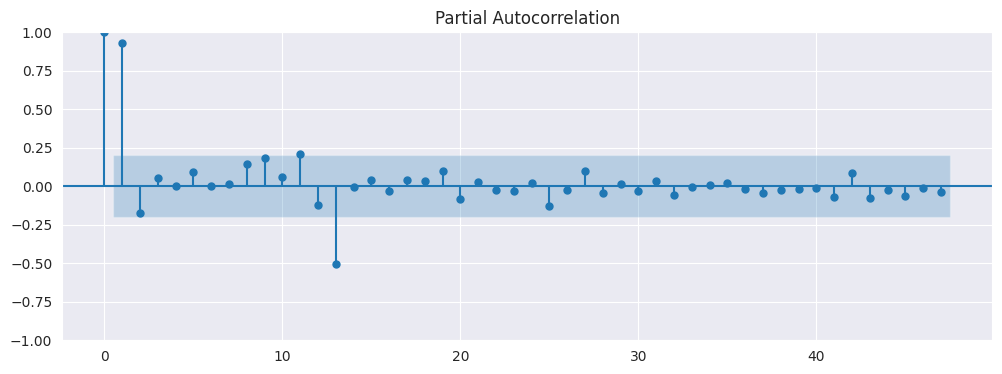

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_acf(df.Passengers,lags=95)
    tsa_plots.plot_pacf(df.Passengers,lags=47)
    plt.show()

In [ ]:
visual = df1.copy()
visual.reset_index(inplace=True)
visual['date'] = pd.to_datetime(visual['Date'])
visual['year'] = visual['Date'].dt.year
visual['month'] = visual['Date'].dt.month
visual['week'] = visual['Date'].dt.isocalendar().week
visual['quarter'] = visual['Date'].dt.quarter
visual['day_of_week'] = visual['Date'].dt.day_name()
visual.drop('Date', axis =1 , inplace= True)
visual.head(10)

Passengers       date  year  month  week  quarter day_of_week
0         112 1995-01-01  1995      1    52        1      Sunday
1         118 1995-02-01  1995      2     5        1   Wednesday
2         132 1995-03-01  1995      3     9        1   Wednesday
3         129 1995-04-01  1995      4    13        2    Saturday
4         121 1995-05-01  1995      5    18        2      Monday
5         135 1995-06-01  1995      6    22        2    Thursday
6         148 1995-07-01  1995      7    26        3    Saturday
7         148 1995-08-01  1995      8    31        3     Tuesday
8         136 1995-09-01  1995      9    35        3      Friday
9         119 1995-10-01  1995     10    39        4      Sunday

In [ ]:
visual.year.unique()

array([1995, 1996, 1997, 1998, 1999])

In [ ]:
# data
df_1995 = visual[visual['year']==1995][['month','Passengers']]
df_1995 = df_1995.groupby('month').agg({"Passengers" : "mean"}).reset_index().rename(columns={'Passengers':'1995'})
df_1996 = visual[visual['year']==1996][['month','Passengers']]
df_1996 = df_1996.groupby('month').agg({"Passengers" : "mean"}).reset_index().rename(columns={'Passengers':'1996'})
df_1997 = visual[visual['year']==1997][['month','Passengers']]
df_1997 = df_1997.groupby('month').agg({"Passengers" : "mean"}).reset_index().rename(columns={'Passengers':'1997'})
df_1998 = visual[visual['year']==1998][['month','Passengers']]
df_1998 = df_1998.groupby('month').agg({"Passengers" : "mean"}).reset_index().rename(columns={'Passengers':'1998'})
df_1999 = visual[visual['year']==1999][['month','Passengers']]
df_1999 = df_1999.groupby('month').agg({"Passengers" : "mean"}).reset_index().rename(columns={'Passengers':'1999'})
df_2000 = visual[visual['year']==2000][['month','Passengers']]
df_2000 = df_2000.groupby('month').agg({"Passengers" : "mean"}).reset_index().rename(columns={'Passengers':'2000'})
df_2001 = visual[visual['year']==2001][['month','Passengers']]
df_2001 = df_2001.groupby('month').agg({"Passengers" : "mean"}).reset_index().rename(columns={'Passengers':'2001'})
df_2002 = visual[visual['year']==2002][['month','Passengers']]
df_2002 = df_2002.groupby('month').agg({"Passengers" : "mean"}).reset_index().rename(columns={'Passengers':'2002'})



df_year = df_1995.merge(df_1996,on='month').merge(df_1997,on='month').merge(df_1998,on='month').merge(df_1999,on='month')\
.merge(df_2000,on='month').merge(df_2001,on='month').merge(df_2002,on='month')

# top levels
top_labels = ['1995', '1996', '1997', '1998', '1999','2000','2001','2002']

colors = ['rgb(6, 19, 14)', 'rgb(18, 58, 43)',
          'rgb(31, 97, 71)', 'rgb(43, 136, 100)',
          'rgb(55, 174, 129)','rgb(81, 200, 154)',
          'rgb(119, 212, 176)','rgb(158, 224, 199)']

# X axis value
df_year = df_year[['1995', '1996', '1997', '1998', '1999','2000','2001','2002']].replace(np.nan,0)
x_data = df_year.values

# y axis value (Month)
df_1995['month'] =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y_data = df_1995['month'].tolist()

fig = go.Figure()
for i in range(0, len(x_data)):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))


fig.update_layout(title='Avg Passengers for each Year',
    xaxis=dict(showgrid=False,
               zeroline=False, domain=[0.15, 1]),
    yaxis=dict(showgrid=False, showline=False,
               showticklabels=False, zeroline=False),
    barmode='stack',
    template="plotly_white",
    margin=dict(l=0, r=50, t=100, b=10),
    showlegend=False,
)

annotations = []
for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                          showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]
fig.update_layout(
    annotations=annotations)
fig.show()

In [ ]:
# data
import calendar
df_m_sa = visual.groupby('month').agg({"Passengers" : "mean"}).reset_index()
df_m_sa['Passengers'] = round(df_m_sa['Passengers'],2)
df_m_sa['month_text'] = df_m_sa['month'].apply(lambda x: calendar.month_abbr[x])
df_m_sa['text'] = df_m_sa['month_text'] + ' - ' + df_m_sa['Passengers'].astype(str)

df_w_sa = visual.groupby('week').agg({"Passengers" : "mean"}).reset_index()
df_q_sa = visual.groupby('quarter').agg({"Passengers" : "mean"}).reset_index()
# chart color
df_m_sa['color'] = '#496595'
df_m_sa['color'][:-1] = '#c6ccd8'
df_w_sa['color'] = '#c6ccd8'

# chart
fig = make_subplots(rows=2, cols=2, vertical_spacing=0.08,
                    row_heights=[0.7, 0.3],
                    specs=[[{"type": "bar"}, {"type": "pie"}],
                           [{"colspan": 2}, None]],
                    column_widths=[0.7, 0.3],
                    subplot_titles=("Month wise Avg Passengers Analysis", "Quarter wise Avg Passengers Analysis",
                                    "Week wise Avg Passengers Analysis"))

fig.add_trace(go.Bar(x=df_m_sa['Passengers'], y=df_m_sa['month'], marker=dict(color= df_m_sa['color']),
                     text=df_m_sa['text'],textposition='auto',
                     name='Month', orientation='h'),
                     row=1, col=1)
fig.add_trace(go.Pie(values=df_q_sa['Passengers'], labels=df_q_sa['quarter'], name='Quarter',
                     marker=dict(colors=['#334668','#496595','#6D83AA','#91A2BF','#C8D0DF']), hole=0.7,
                     hoverinfo='label+percent+value', textinfo='label+percent'),
                     row=1, col=2)
fig.add_trace(go.Scatter(x=df_w_sa['week'], y=df_w_sa['Passengers'], mode='lines+markers', fill='tozeroy', fillcolor='#c6ccd8',
                     marker=dict(color= '#496595'), name='Week'),
                     row=2, col=1)

# styling
fig.update_yaxes(visible=False, row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_xaxes(tickmode = 'array', tickvals=df_w_sa.week, ticktext=[i for i in range(1,53)],
                 row=2, col=1)
fig.update_yaxes(visible=False, row=2, col=1)
fig.update_layout(height=750, bargap=0.15,
                  margin=dict(b=0,r=20,l=20),
                  title_text="Average Passengers Analysis",
                  template="plotly_white",
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False)
fig.show()

In [ ]:
# data
df_dw_sa = visual.groupby('day_of_week').agg({"Passengers" : "mean"}).reset_index()
df_dw_sa.Passengers = round(df_dw_sa.Passengers, 2)

# chart
fig = px.bar(df_dw_sa, y='day_of_week', x='Passengers', title='Avg Passengers vs Day of Week',
             color_discrete_sequence=['#c6ccd8'], text='Passengers',
             category_orders=dict(day_of_week=["Monday","Tuesday","Wednesday","Thursday", "Friday","Saturday","Sunday"]))
fig.update_yaxes(showgrid=False, ticksuffix=' ', showline=False)
fig.update_xaxes(visible=False)
fig.update_layout(margin=dict(t=60, b=0, l=0, r=0), height=350,
                  hovermode="y unified",
                  yaxis_title=" ", template='plotly_white',
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#c6ccd8", font_size=13, font_family="Lato, sans-serif"))

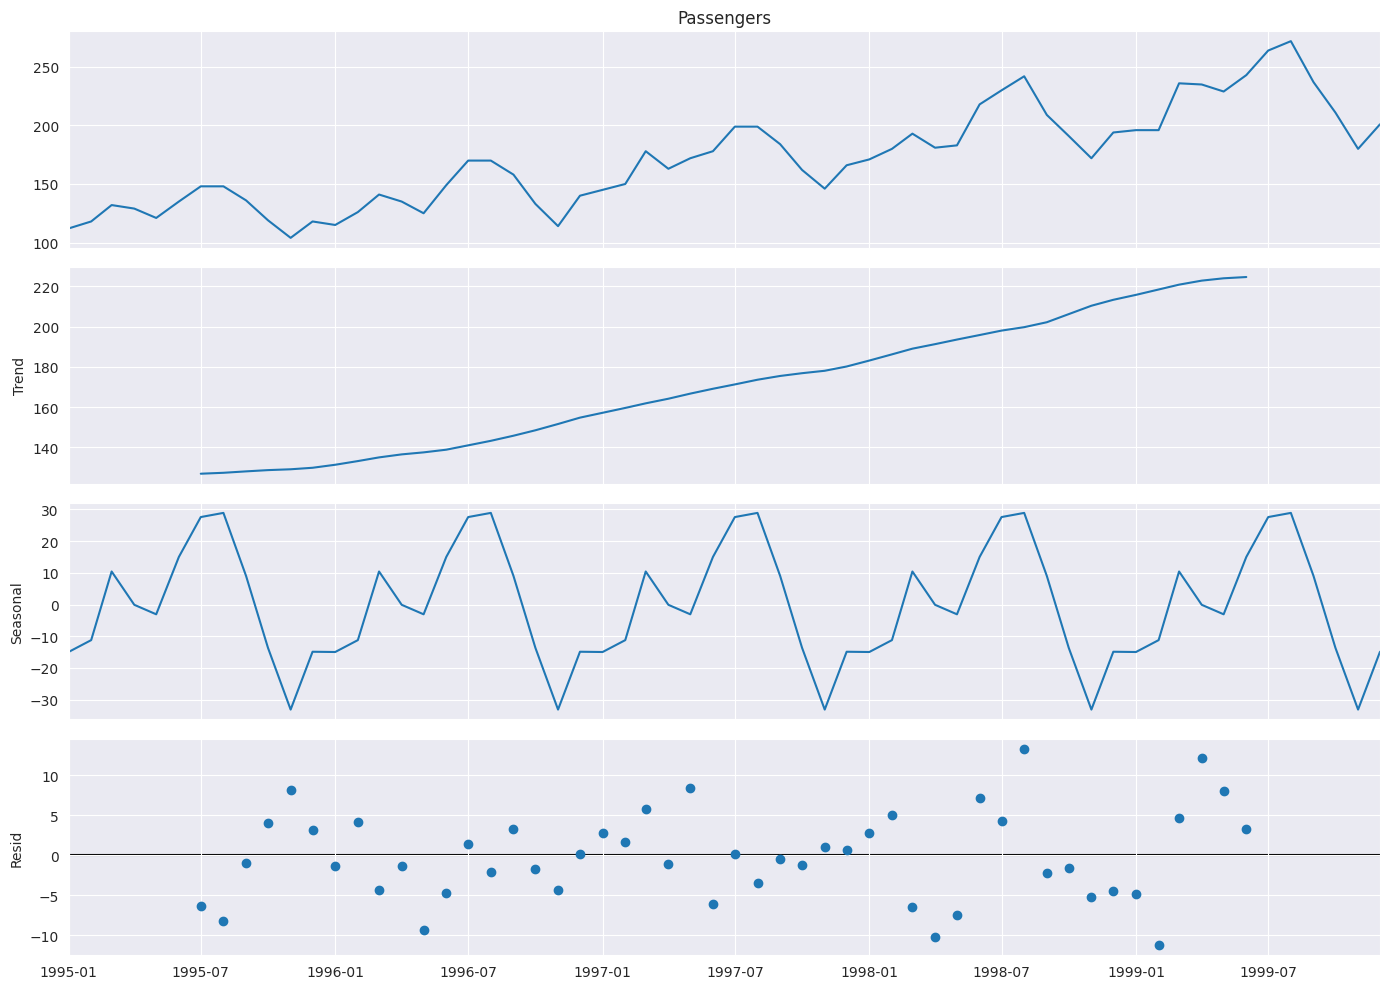

In [ ]:
#Additive Seasonal Decomposition
decompose_ts_add = seasonal_decompose(df1.Passengers,period=12, model='additive')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

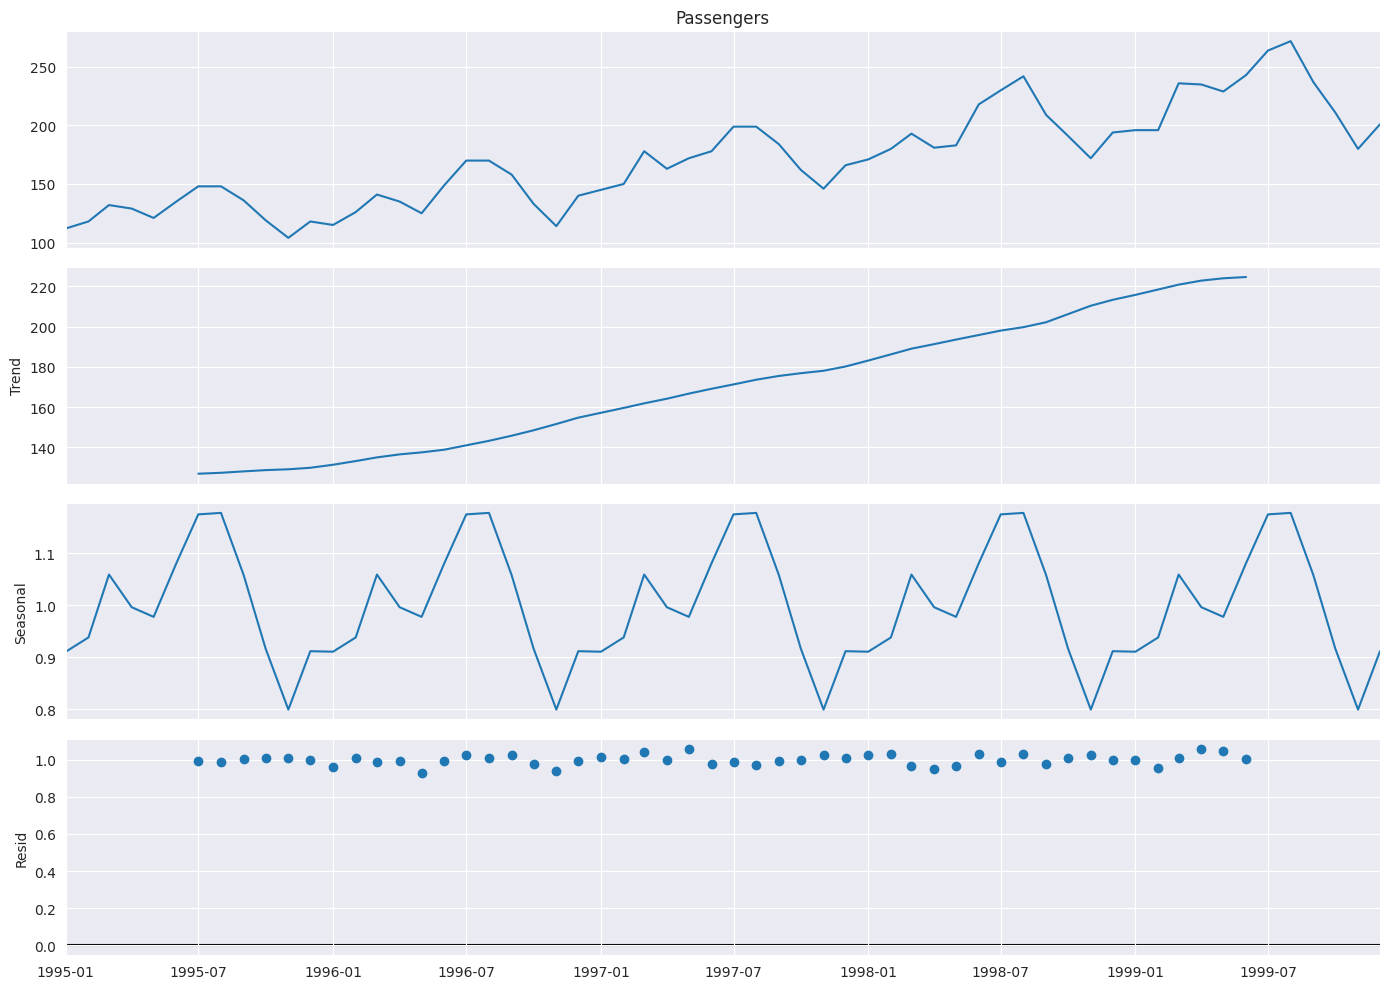

In [ ]:
#Multiplicative Seasonal Decomposition
decompose_ts_add = seasonal_decompose(df1.Passengers,period=12, model='multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

In [ ]:
# Splitting Train and Test Data
# Leaving Test Data with 2 Years of Time Series
size = 72
train_data = df1[:size]
test_data = df1[size:]

In [ ]:
print('Train:',train_data.index.min(),train_data.index.max(),'\n',
'Test:',test_data.index.min(),test_data.index.max())

Train: 1995-01-01 00:00:00 1999-12-01 00:00:00 
 Test: NaT NaT


<Axes: xlabel='Date'>

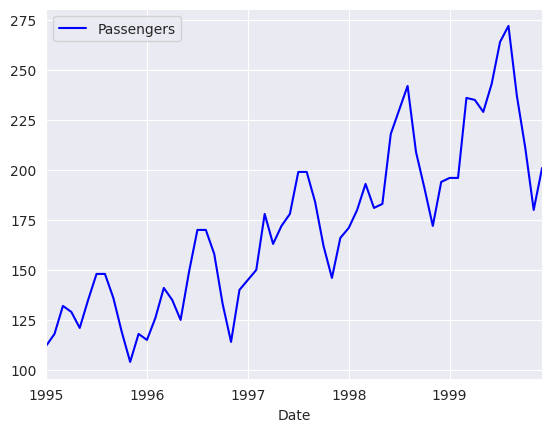

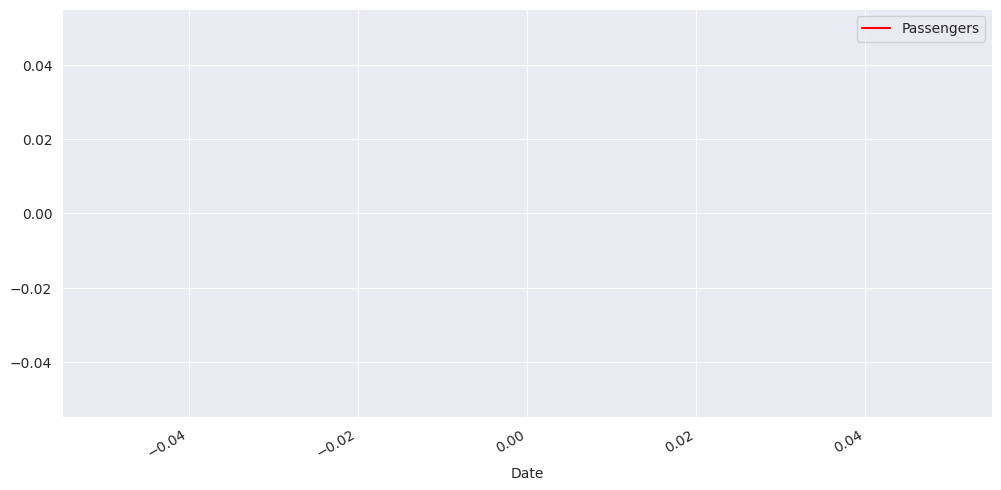

In [ ]:
train_data.plot(legend=True,label='TRAIN',color='blue')
test_data.plot(legend=True,label='TEST', figsize=(12,6),color='red')

In [ ]:
#Evaluation Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [ ]:
#Evaluation Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Adjust the split ratio as needed
train_size = int(len(df) * 0.8)  # Example: 80% for training
train_data, test_data = df[:train_size], df[train_size:]

ses_model = SimpleExpSmoothing(train_data['Passengers']).fit(optimized=True)
test_pred_ses = ses_model.forecast(len(test_data)) # Forecast for the length of the test set
train_pred_ses = ses_model.fittedvalues

# Now the shapes should be consistent
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_data['Passengers']))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_data['Passengers']))
mape_ses = MAPE(test_pred_ses,test_data['Passengers'])
print('Simple Exponential Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error = 14.717178698048318 
 Train Root Mean Squared Error = 19.018342993000044 
 Test Root Mean Squared Error = 66.15512076059656


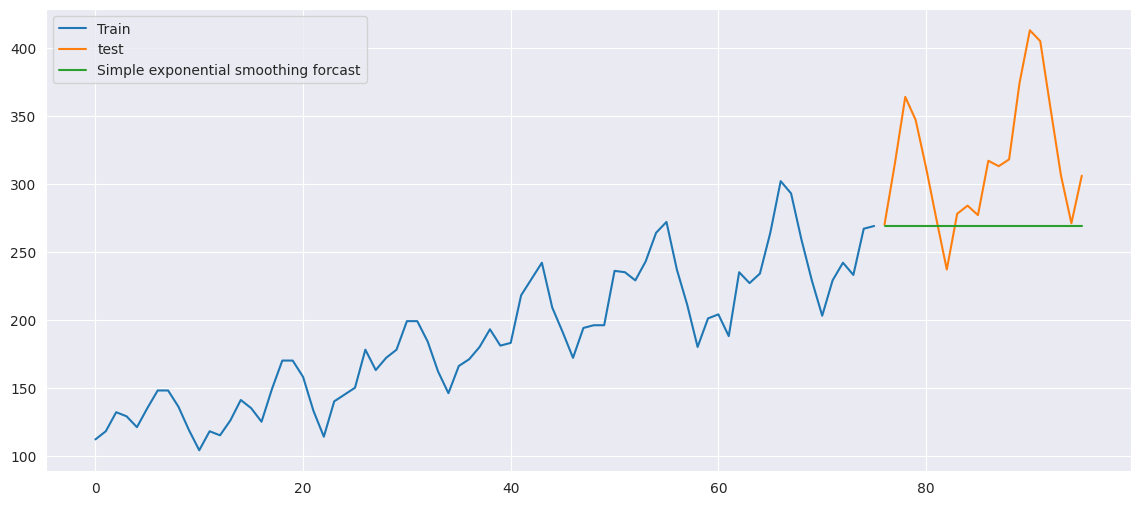

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

# Convert the index to datetime if it's not already
train_data.index = pd.to_datetime(train_data.index, format='%b') # Tell pandas how to parse the date format
test_data.index = pd.to_datetime(test_data.index, format='%b')

plt.figure(figsize=(14,6))
# Convert the datetime index to matplotlib dates
plt.plot(pd.to_numeric(train_data.index), train_data['Passengers'], label='Train')
plt.plot(pd.to_numeric(test_data.index), test_data['Passengers'], label='test')
plt.plot(pd.to_numeric(test_pred_ses.index), test_pred_ses, label='Simple exponential smoothing forcast') # Use the index of test_pred_ses
plt.legend(loc='best')
plt.show()

In [ ]:
#Extract the 'Passengers' column as a Series for the model
dexp_model  = Holt(train_data['Passengers']).fit(optimized=True)
# Forecast for the same length as the test data
test_pred_dexp = dexp_model.forecast(len(test_data))
train_pred_dexp = dexp_model.fittedvalues
test_rmse_dexp = sqrt(mean_squared_error(test_pred_dexp,test_data.Passengers))
train_rmse_dexp = sqrt(mean_squared_error(train_pred_dexp,train_data['Passengers'])) # Use the 'Passengers' column for training data as well
mape_dexp = MAPE(test_pred_dexp,test_data.Passengers)
print('Simple Exponential Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_dexp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_dexp),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_dexp))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error = 11.380414769415333 
 Train Root Mean Squared Error = 19.20767752162923 
 Test Root Mean Squared Error = 46.18643485850761


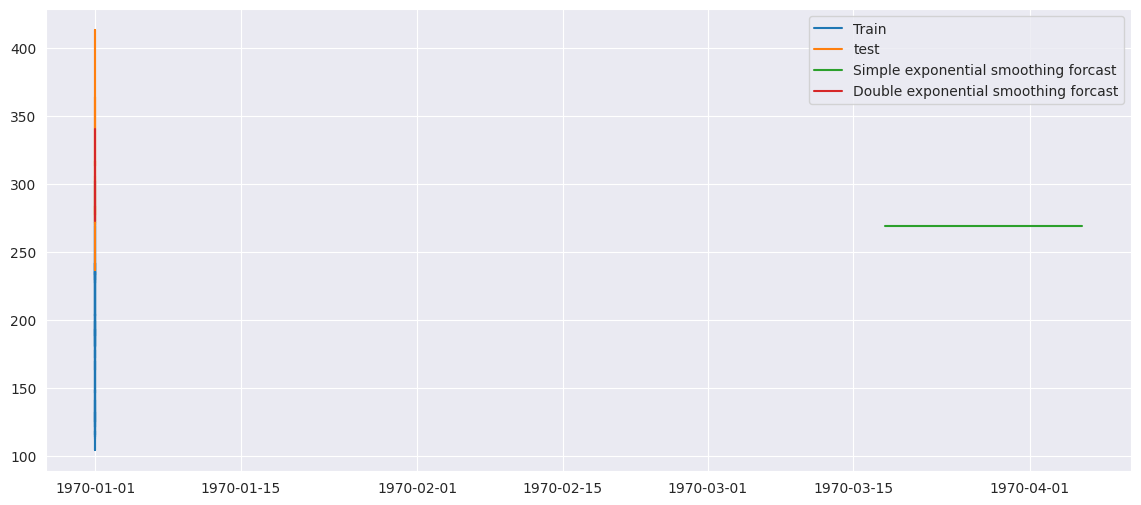

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

# Convert the index to datetime if it's not already
train_data.index = pd.to_datetime(train_data.index, format='%b') # Tell pandas how to parse the date format
test_data.index = pd.to_datetime(test_data.index, format='%b')

plt.figure(figsize=(14,6))
# Convert the datetime index to matplotlib dates
plt.plot(train_data.index, train_data['Passengers'], label='Train')
plt.plot(test_data.index, test_data['Passengers'], label='test')
plt.plot(test_pred_ses.index, test_pred_ses, label='Simple exponential smoothing forcast') # Use the index of test_pred_ses
plt.plot(test_pred_dexp.index, test_pred_dexp, label='Double exponential smoothing forcast') # Use the index of test_pred_dexp
plt.legend(loc='best')
plt.show()

In [ ]:
texp_add_model  = ExponentialSmoothing(train_data['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
# Forecast for the same length as the test data
test_pred_ad_texp = texp_add_model.forecast(len(test_data)) # Change this line to match the length of test data
train_pred_ad_texp = texp_add_model.fittedvalues
test_rmse_ad_texp = sqrt(mean_squared_error(test_pred_ad_texp,test_data.Passengers))
# Extract the 'Passengers' column from train_data for RMSE calculation
train_rmse_ad_texp = sqrt(mean_squared_error(train_pred_ad_texp,train_data['Passengers']))
mape_ad_texp = MAPE(test_pred_ad_texp,test_data.Passengers)
print('Triple Exponential with Additive Trend and Seosonality Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_texp),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ad_texp))

Triple Exponential with Additive Trend and Seosonality Method Evaluation 
 Mean Absolute Percent Error = 8.724206745976666 
 Train Root Mean Squared Error = 7.813467948384908 
 Test Root Mean Squared Error = 37.7325184683014


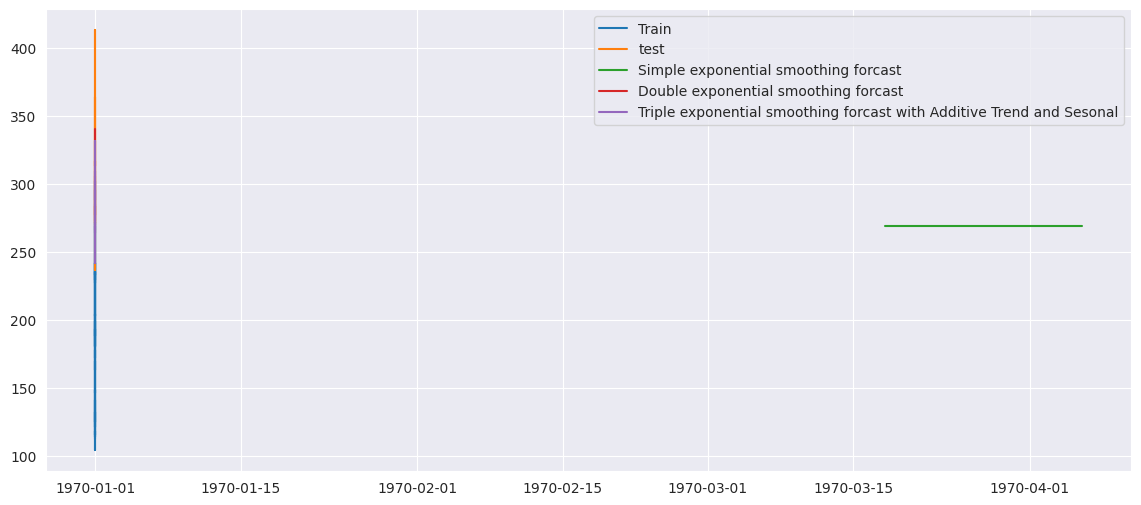

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_data.index, train_data['Passengers'], label='Train')
plt.plot(test_data.index, test_data['Passengers'], label='test')
plt.plot(test_pred_ses.index, test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp.index, test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp.index, test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.legend(loc='best')
plt.show()

In [ ]:
# Ensure the 'Passengers' column in train_data is numeric
train_data['Passengers'] = pd.to_numeric(train_data['Passengers'], errors='coerce')

texp_mul_ad_model  = ExponentialSmoothing(train_data['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
# Forecast for the same length as the test data
test_pred_mul_ad_texp = texp_mul_ad_model.forecast(len(test_data)) # Use len(test_data) to get the correct length
train_pred_mul_ad_texp = texp_mul_ad_model.fittedvalues
test_rmse_mul_ad_texp = sqrt(mean_squared_error(test_pred_mul_ad_texp,test_data.Passengers))
# Make sure you are comparing the fitted values with the correct column in the training data
train_rmse_mul_ad_texp = sqrt(mean_squared_error(train_pred_mul_ad_texp,train_data['Passengers']))
mape_mul_ad_texp = MAPE(test_pred_mul_ad_texp,test_data.Passengers)
print('Triple Exponential Method with Multiplicative Seasonality and Additive Trend',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_mul_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_ad_texp),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_mul_ad_texp))

Triple Exponential Method with Multiplicative Seasonality and Additive Trend 
 Mean Absolute Percent Error = 9.375576393235455 
 Train Root Mean Squared Error = 6.442069826765842 
 Test Root Mean Squared Error = 33.878136662990336


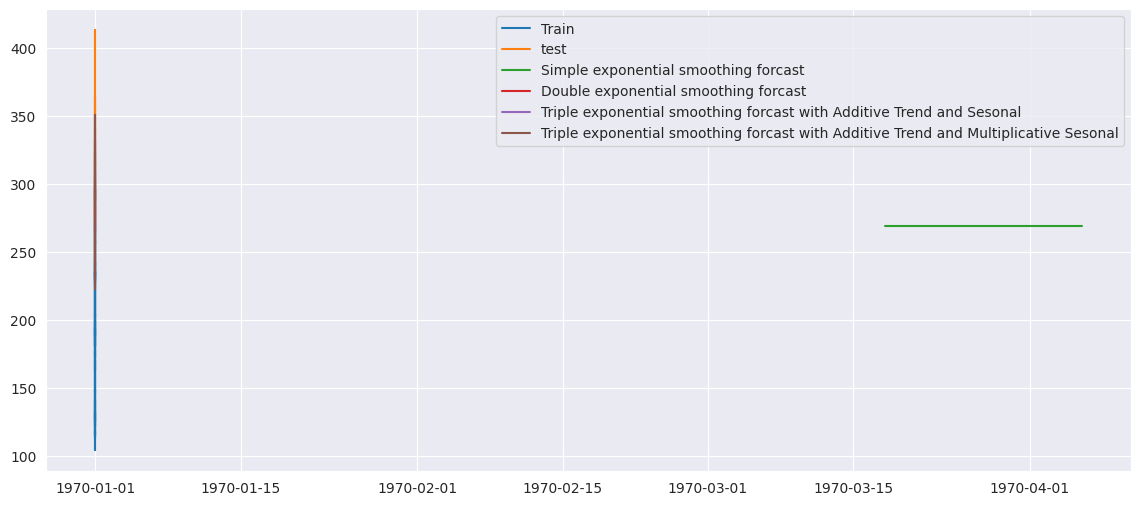

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_data.index, train_data['Passengers'], label='Train') # Specify the x and y values for plotting
plt.plot(test_data.index, test_data['Passengers'], label='test') # Specify the x and y values for plotting
plt.plot(test_pred_ses.index, test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp.index, test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp.index, test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp.index, test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.legend(loc='best')
plt.show()

In [ ]:
texp_ad_mul_model  = ExponentialSmoothing(train_data['Passengers'],seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5)
# Forecast for the same length as the test data
test_pred_ad_mul_texp  = texp_ad_mul_model.forecast(len(test_data)) # Use len(test_data) to get the correct length
train_pred_ad_mul_texp  = texp_ad_mul_model.fittedvalues
test_rmse_ad_mul_texp  = sqrt(mean_squared_error(test_pred_ad_mul_texp ,test_data.Passengers))
# Pass the 'Passengers' column from train_data to mean_squared_error
train_rmse_ad_mul_texp  = sqrt(mean_squared_error(train_pred_ad_mul_texp ,train_data['Passengers']))
mape_ad_mul_texp  = MAPE(test_pred_ad_mul_texp,test_data.Passengers)
print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ad_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_mul_texp ),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ad_mul_texp ))

Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error = 5.966716524006605 
 Train Root Mean Squared Error = 11.774698743346079 
 Test Root Mean Squared Error = 26.44140912914607


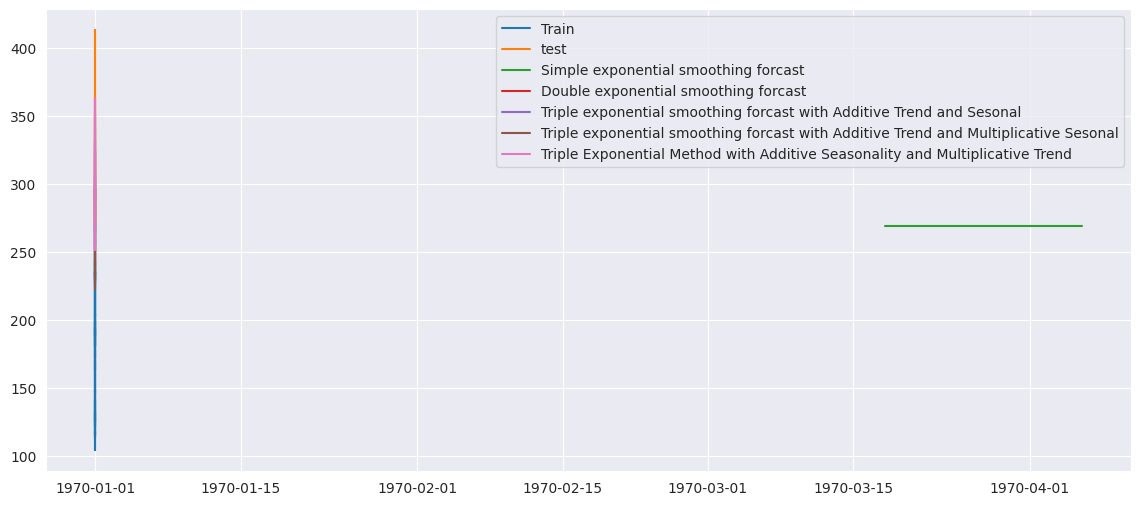

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_data.index, train_data['Passengers'], label='Train') # Plot index as x-axis and 'Passengers' as y-axis
plt.plot(test_data.index, test_data['Passengers'], label='test') # Plot index as x-axis and 'Passengers' as y-axis
plt.plot(test_pred_ses.index, test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp.index, test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp.index, test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp.index, test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp.index, test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.legend(loc='best')
plt.show()

In [ ]:
texp_mul_model  = ExponentialSmoothing(train_data['Passengers'],seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True) # Pass only the 'Passengers' column
# Forecast for the same length as the test data
test_pred_mul_texp  = texp_mul_model.forecast(len(test_data)) # Use len(test_data) to ensure consistent length
train_pred_mul_texp  = texp_mul_model.fittedvalues
test_rmse_mul_texp  = sqrt(mean_squared_error(test_pred_mul_texp ,test_data.Passengers))
train_rmse_mul_texp  = sqrt(mean_squared_error(train_pred_mul_texp ,train_data['Passengers'])) # Pass the 'Passengers' column for training RMSE calculation
mape_mul_texp  = MAPE(test_pred_mul_texp,test_data.Passengers)
print('Triple Exponential Method with multiplicative Trend and Seasonality',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_texp ),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_mul_texp ))

Triple Exponential Method with multiplicative Trend and Seasonality 
 Mean Absolute Percent Error = 6.262058674493239 
 Train Root Mean Squared Error = 6.44522963680336 
 Test Root Mean Squared Error = 23.457626547015344


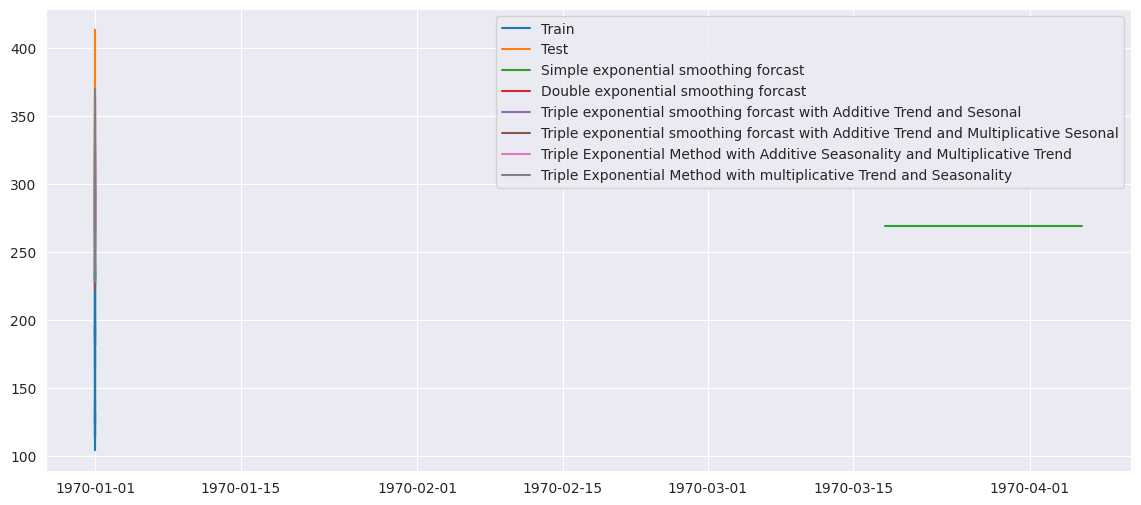

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_data.index, train_data['Passengers'], label='Train') # Plot the 'Passengers' column against the index
plt.plot(test_data.index, test_data['Passengers'], label='Test')  # Plot the 'Passengers' column against the index
plt.plot(test_pred_ses.index, test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp.index, test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad_texp.index, test_pred_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp.index, test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp.index, test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.plot(test_pred_mul_texp.index, test_pred_mul_texp, label='Triple Exponential Method with multiplicative Trend and Seasonality')
plt.legend(loc='best')
plt.show()

In [ ]:
#Comparing the results

Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_ad","Triple_Exp_mul_ad","Triple_Exp_ad_mul"\
                                  ,"Triple_Exp_mul"]),\
        "Train_RMSE":pd.Series([train_rmse_ses,train_rmse_dexp,train_rmse_ad_texp,train_rmse_mul_ad_texp,train_rmse_ad_mul_texp,train_rmse_mul_texp]),\
        "Test_MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad_texp,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp]),\
        "Test_RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['Test_MAPE(%)'], inplace=True, ignore_index=True)
table_evaluation

Models  Train_RMSE  Test_MAPE(%)  Test_RMSE_Values
0  Triple_Exp_ad_mul   11.774699      5.966717         26.441409
1     Triple_Exp_mul    6.445230      6.262059         23.457627
2      Triple_Exp_ad    7.813468      8.724207         37.732518
3  Triple_Exp_mul_ad    6.442070      9.375576         33.878137
4         Double_Exp   19.207678     11.380415         46.186435
5         Simple_Exp   19.018343     14.717179         66.155121

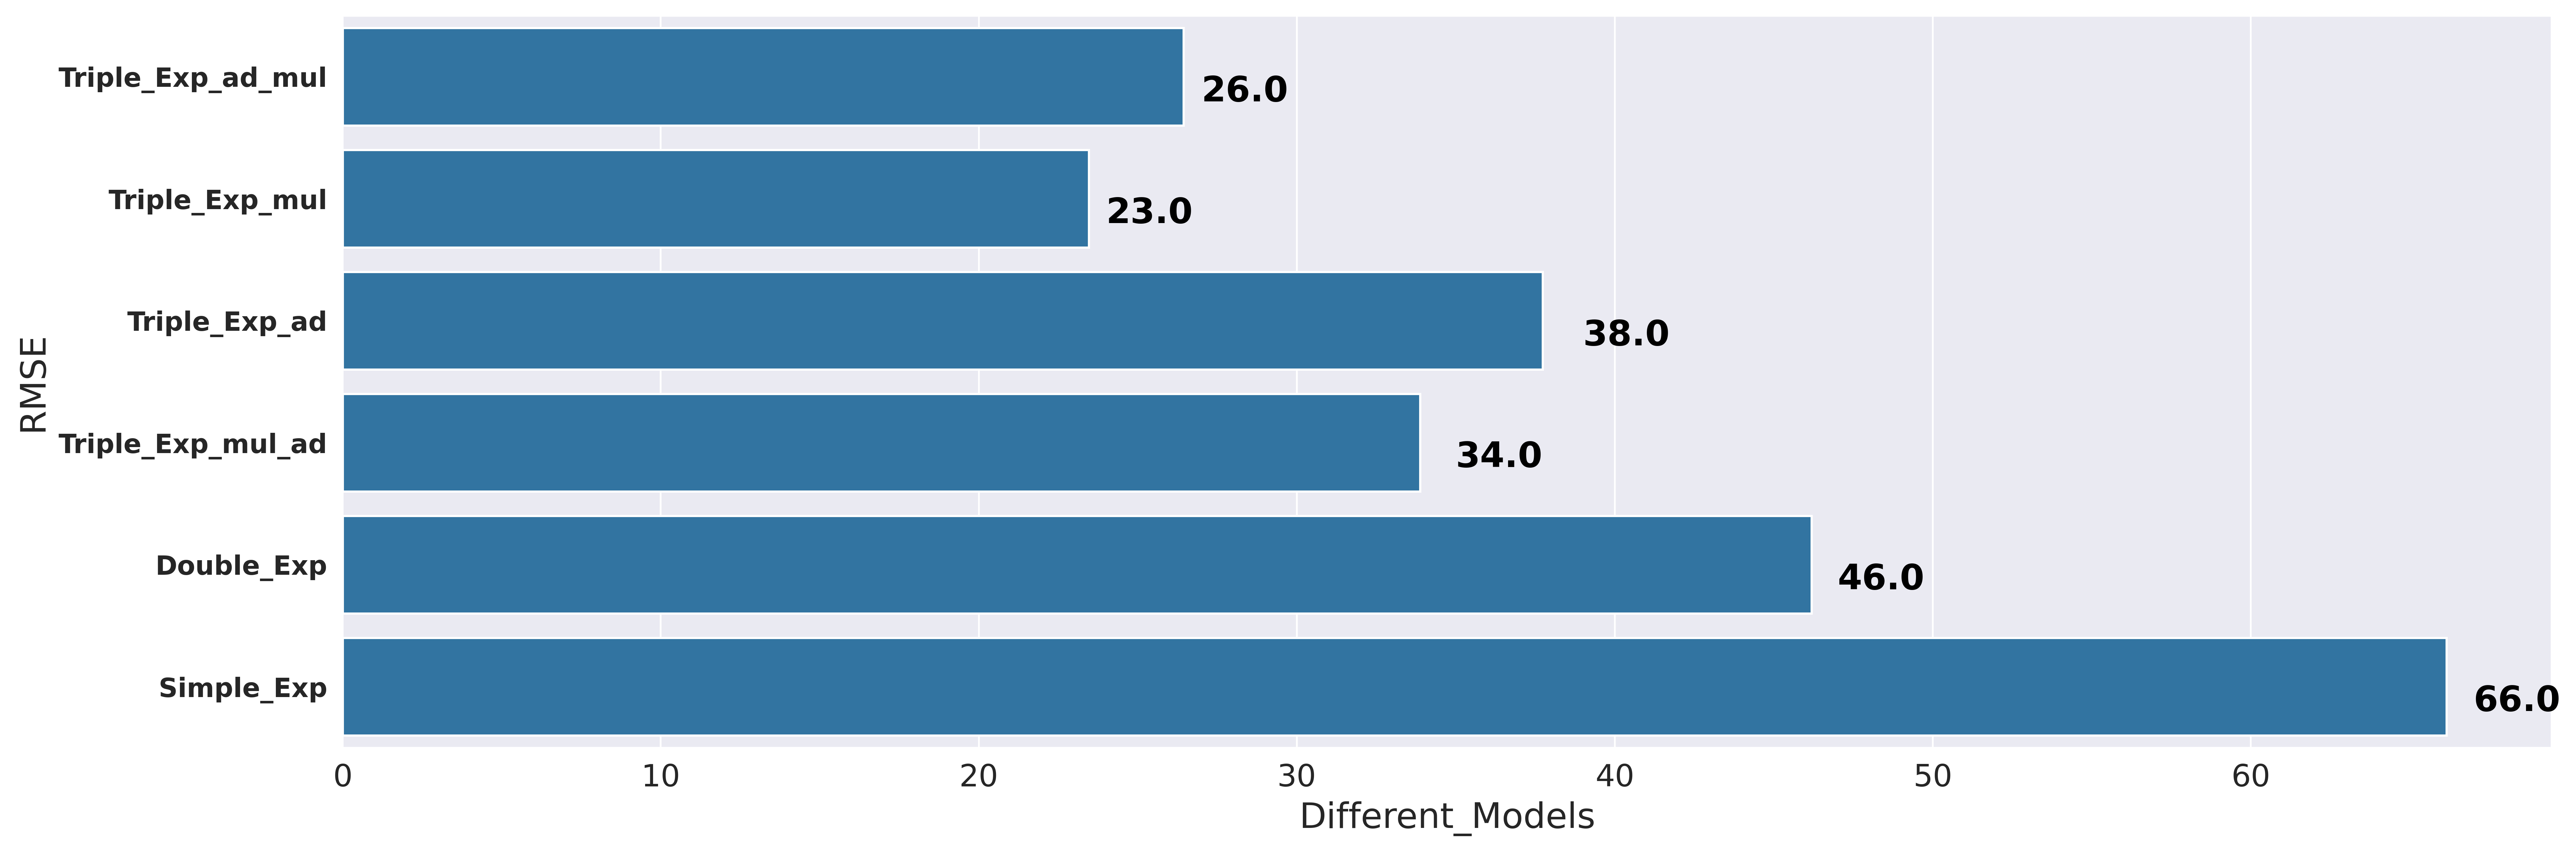

In [ ]:
#Visualizing Models Performance
f, axe = plt.subplots(1,1, figsize=(18,6), dpi=500)
sns.barplot(x='Test_RMSE_Values', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=14)


for i, v in enumerate(np.round(table_evaluation.Test_RMSE_Values.values,0)):
    axe.text(v + 1, i + .20, str(v),
            color = 'black', fontweight = 'bold', fontsize= 16)

plt.show()

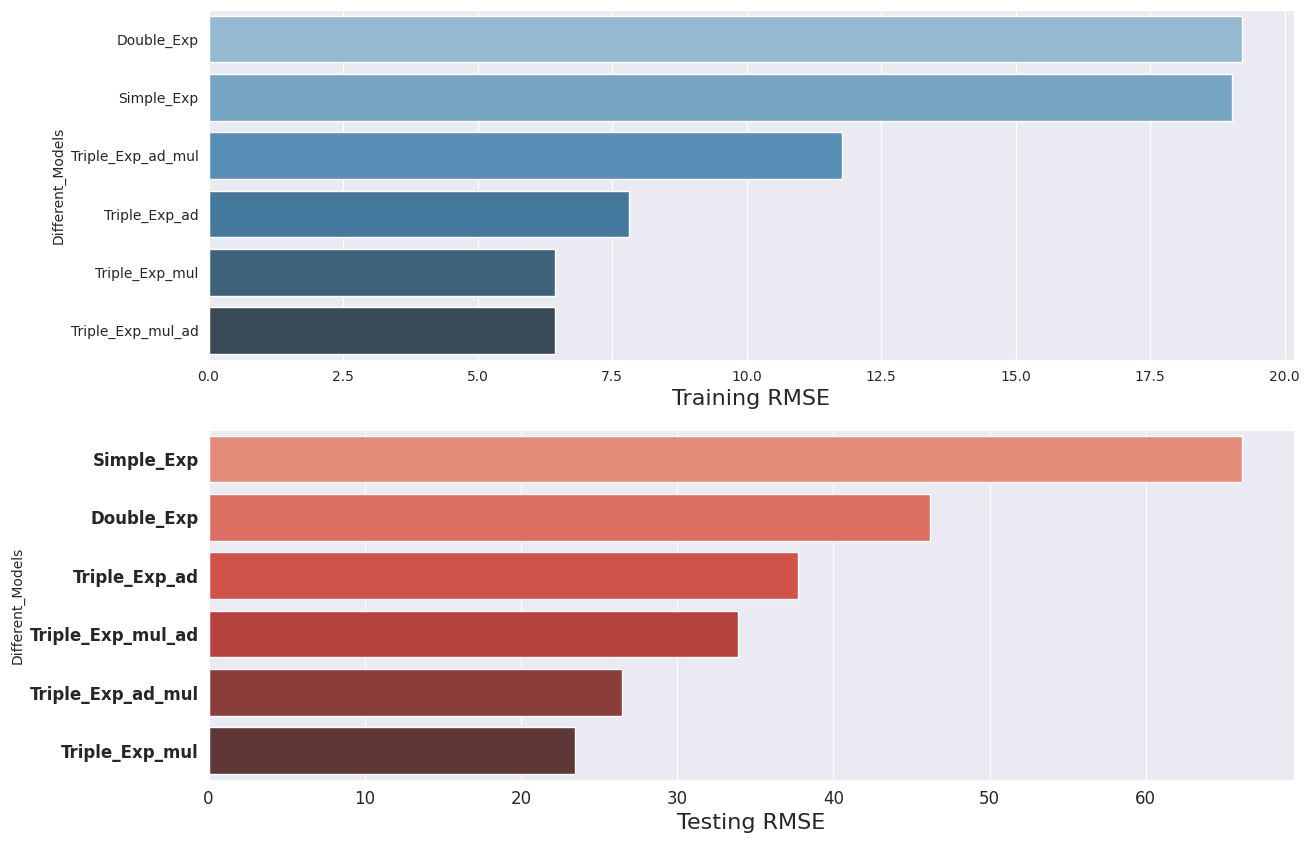

In [ ]:
f, axes = plt.subplots(2,1, figsize=(14,10))
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=12)
train_rmse = table_evaluation.sort_values(by=['Train_RMSE'], ascending=False)

sns.barplot(x='Train_RMSE', y='Models', data = train_rmse, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('Training RMSE', size=16)
axes[0].set_ylabel('Different_Models')

test_rmse = table_evaluation.sort_values(by=['Test_RMSE_Values'], ascending=False)

sns.barplot(x='Test_RMSE_Values', y='Models', data = test_rmse, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('Testing RMSE', size=16)
axes[1].set_ylabel('Different_Models')

plt.show()

In [ ]:
def test_stationarity(timeseries):

    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)

    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

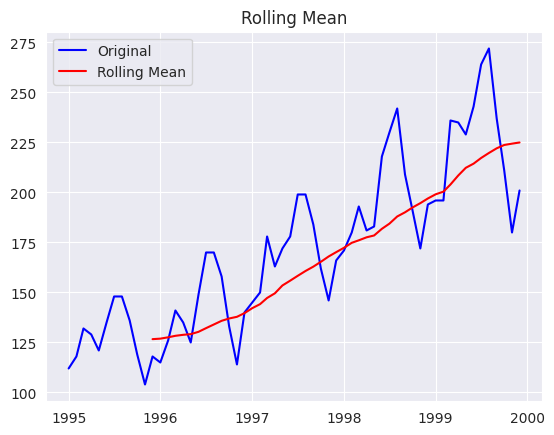

Results of Dickey Fuller Test:
Test Statistic                  2.093529
p-value                         0.998783
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [ ]:
sales= pd.DataFrame()
sales['Passengers'] = df1[['Passengers']]
test_stationarity(sales)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series.dropna())
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
adf_test(sales)

Fail to reject the null hypothesis
Data is non-stationary


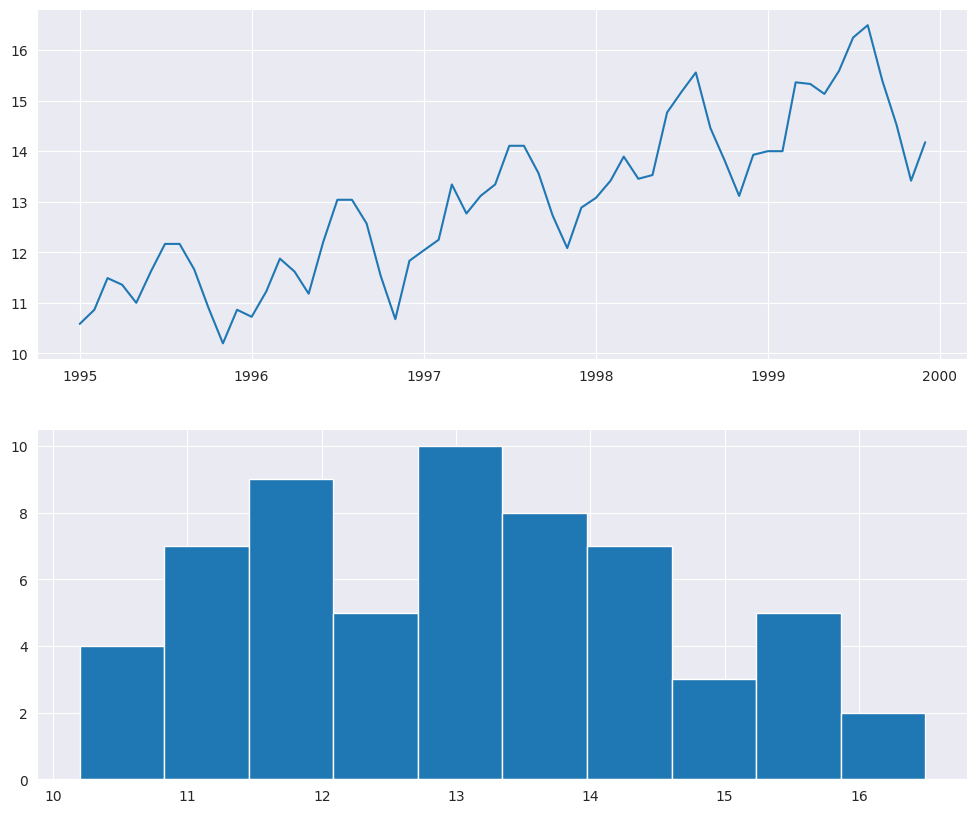

In [ ]:
#Square Root Transform
square_root= pd.DataFrame()
square_root = df1[['Passengers']]
square_root['Passengers'] = np.sqrt(square_root.Passengers)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Passengers'])
#Histogram
plt.subplot(212)
plt.hist(square_root['Passengers'])
plt.show()

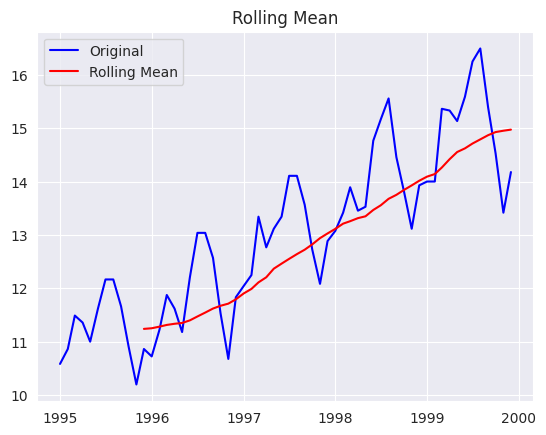

Results of Dickey Fuller Test:
Test Statistic                  1.175011
p-value                         0.995809
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [ ]:
test_stationarity(square_root)

In [ ]:
adf_test(square_root)

Fail to reject the null hypothesis
Data is non-stationary


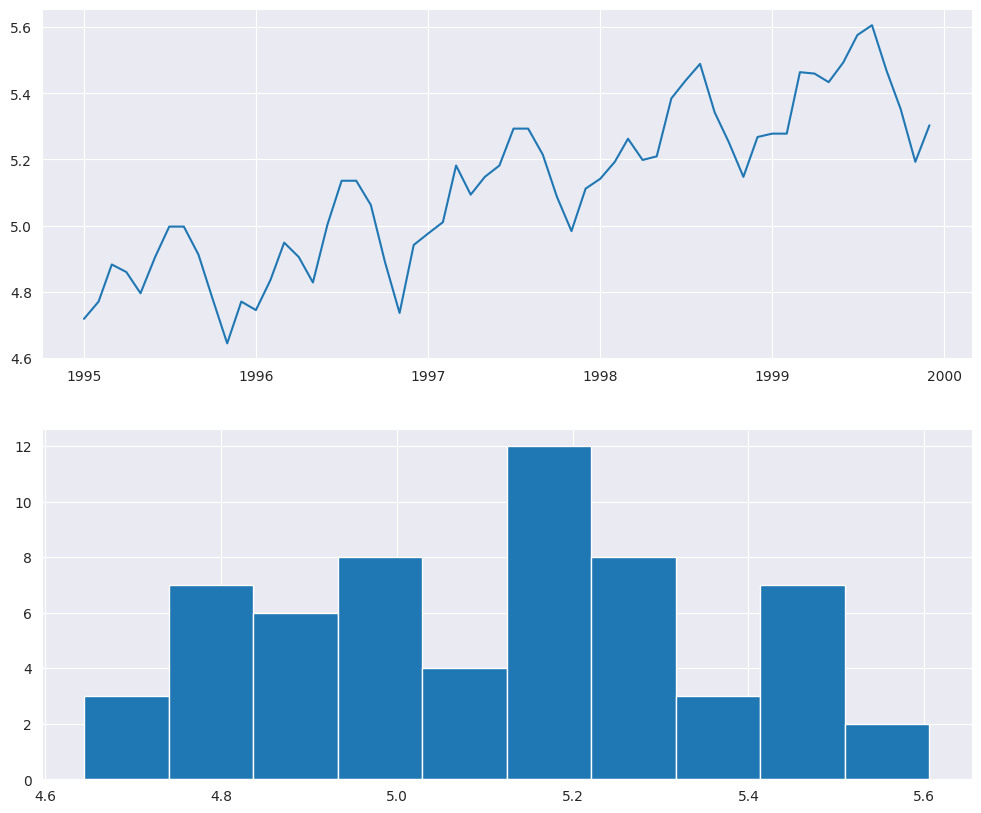

In [ ]:
log = pd.DataFrame()
log = df1[['Passengers']]
log['Passengers'] = np.log(log.Passengers)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Passengers'])
#Histogram
plt.subplot(212)
plt.hist(log['Passengers'])
plt.show()

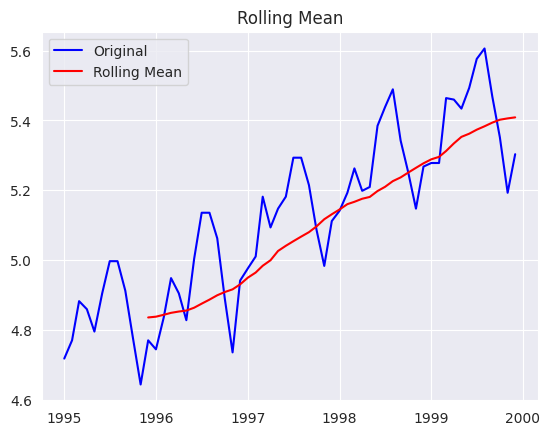

Results of Dickey Fuller Test:
Test Statistic                  0.317699
p-value                         0.978142
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [ ]:
test_stationarity(log)

In [ ]:
adf_test(log)

Fail to reject the null hypothesis
Data is non-stationary


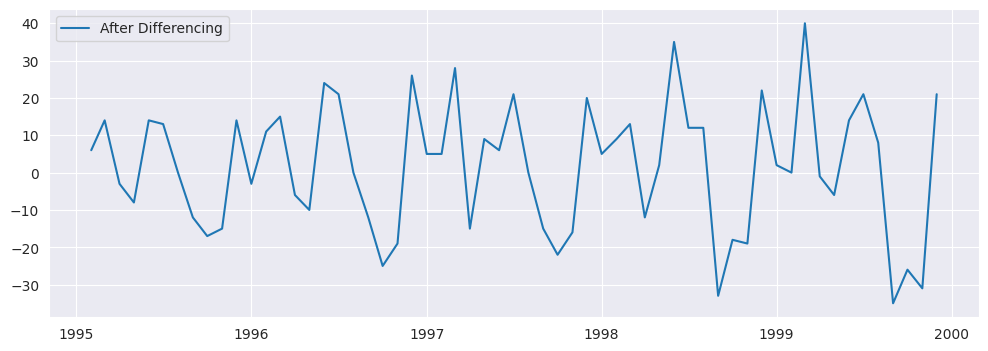

In [ ]:
differencing = df1 - df1.shift(1)
differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(differencing, label='After Differencing')
plt.legend(loc='best')
plt.show()

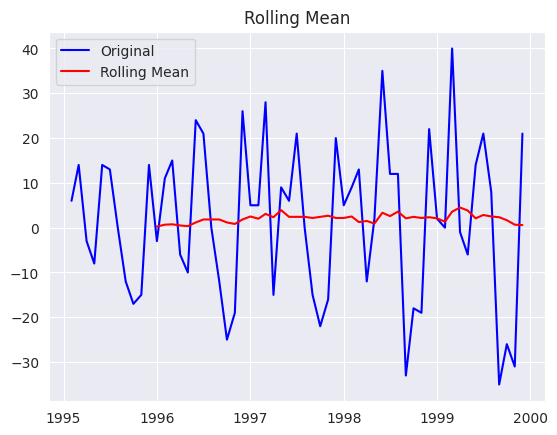

Results of Dickey Fuller Test:
Test Statistic                 -3.307533
p-value                         0.014545
#Lags Used                     11.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [ ]:
test_stationarity(differencing)

In [ ]:
adf_test(differencing)

Reject the null hypothesis
Data is stationary


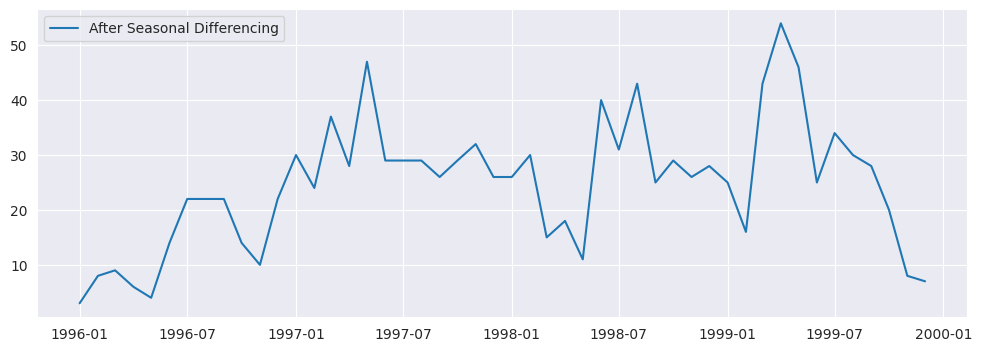

In [ ]:
seasonal_differencing = df1 - df1.shift(12)
seasonal_differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(seasonal_differencing, label='After Seasonal Differencing')
plt.legend(loc='best')
plt.show()

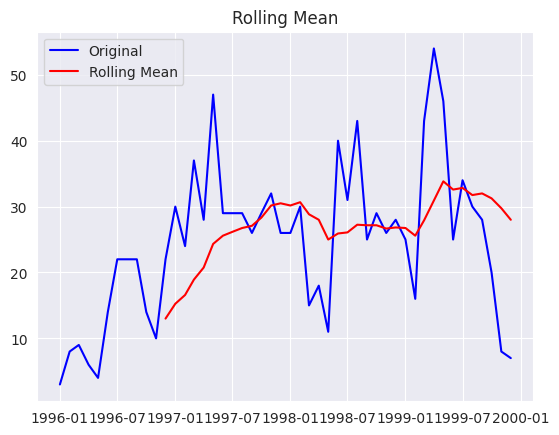

Results of Dickey Fuller Test:
Test Statistic                 -3.503244
p-value                         0.007904
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [ ]:
test_stationarity(seasonal_differencing)

In [ ]:
adf_test(seasonal_differencing)

Reject the null hypothesis
Data is stationary


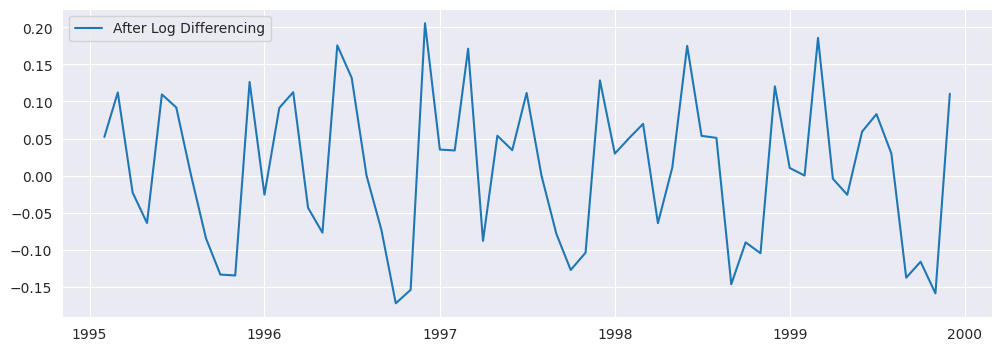

In [ ]:
log_diff = log - log.shift(1)
log_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(log_diff, label='After Log Differencing')
plt.legend(loc='best')
plt.show()

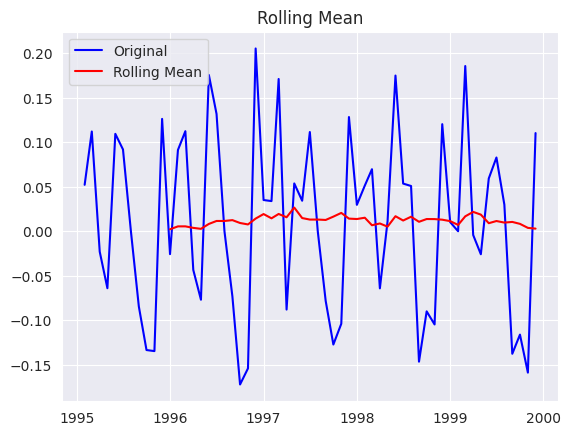

Results of Dickey Fuller Test:
Test Statistic                 -3.458224
p-value                         0.009127
#Lags Used                     11.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [ ]:
test_stationarity(log_diff)

In [ ]:
adf_test(log_diff)

Reject the null hypothesis
Data is stationary


Passengers
Date                  
1995-01-01    4.718499
1995-02-01    4.770685
1995-03-01    4.882802
1995-04-01    4.859812
1995-05-01    4.795791

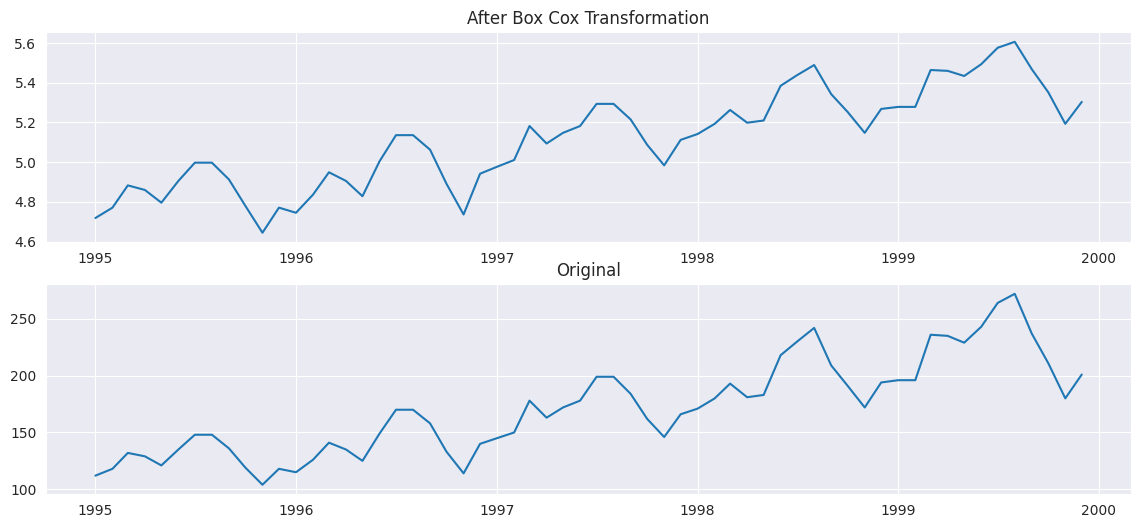

In [ ]:
#Box Cox Transformation
data_boxcox = pd.DataFrame()
data_boxcox['Passengers'] = pd.Series(boxcox(df1['Passengers'], lmbda=0), df1.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(14,6),)
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(df1, label='original')
axis[1].set_title('Original')
plt.show()

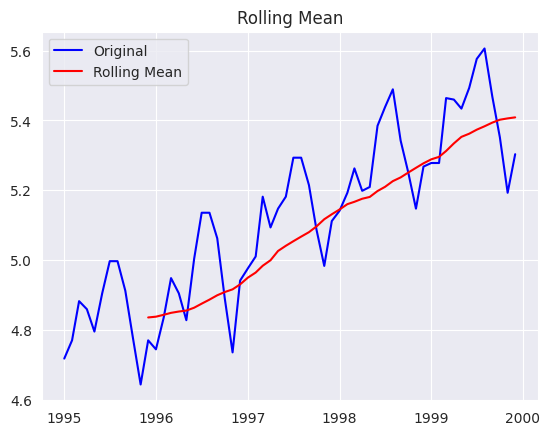

Results of Dickey Fuller Test:
Test Statistic                  0.317699
p-value                         0.978142
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [ ]:
test_stationarity(data_boxcox)

In [ ]:
adf_test(data_boxcox)

Fail to reject the null hypothesis
Data is non-stationary


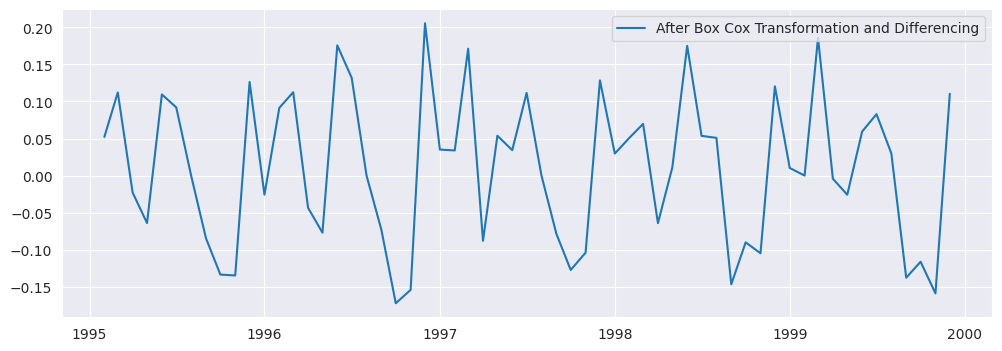

In [ ]:
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

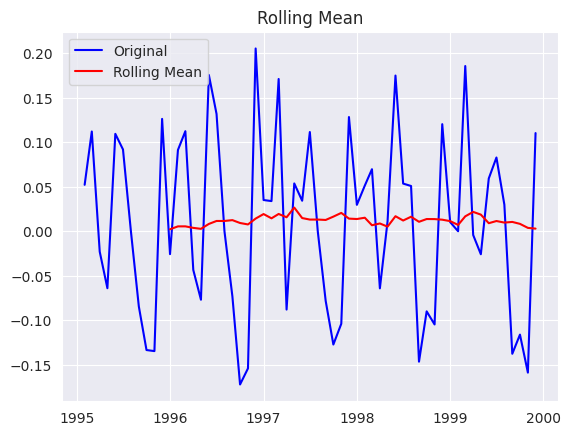

Results of Dickey Fuller Test:
Test Statistic                 -3.458224
p-value                         0.009127
#Lags Used                     11.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [ ]:
#check this log transfered data with function
test_stationarity(data_boxcox_diff)

In [ ]:
adf_test(data_boxcox_diff)

Reject the null hypothesis
Data is stationary


In [ ]:
# grid search ARIMA parameters for a time series

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    #print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
evaluate_models(data_boxcox_diff.Passengers, p_values, d_values, q_values)

Best ARIMA(2, 0, 4) RMSE=0.084


In [ ]:
train_data_boxcox = data_boxcox[:size]
test_data_boxcox = data_boxcox[size:]
train_data_boxcox_diff = data_boxcox_diff[:size]
test_data_boxcox_diff = data_boxcox_diff[size:]

In [ ]:
model = ARIMA(train_data_boxcox_diff, order=(4, 1, 4))
model_fit = model.fit()
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['arima_forecast'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
# We did differencing. So we need to revert it by adding the consecutive observations.
# For that we are using cumsum() method
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].cumsum()
# We removed the first observations after differencing as it was null. Hence, adding the first observation back.
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].add(data_boxcox.Passengers[0])
# Now doing the reverse transformation
# We have done Box Cox Log Log transformation with lambda = 0
# Hence, we have to the exponential as it is the reverse of the log.
y_hat_ar['arima_forecast'] = np.exp(y_hat_ar['arima_forecast'])

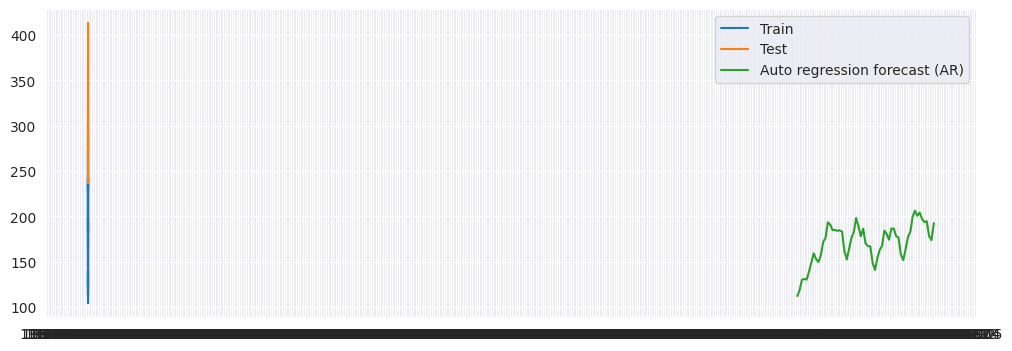

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12,4))
plt.plot(train_data['Passengers'], label='Train')

# Convert index to datetime and format x-axis
plt.plot(mdates.date2num(pd.to_datetime(test_data.index)), test_data['Passengers'], label='Test') # Assuming 'Passengers' is the column you want to plot

plt.plot(y_hat_ar['arima_forecast'][test_data.index.min():], label='Auto regression forecast (AR)')
plt.legend(loc='best')

# Format x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.show()

In [ ]:
model_residual = model_fit.resid
model_residual.mean()

0.0007312129543870957

In [ ]:
adf_test(model_residual)

Fail to reject the null hypothesis
Data is non-stationary


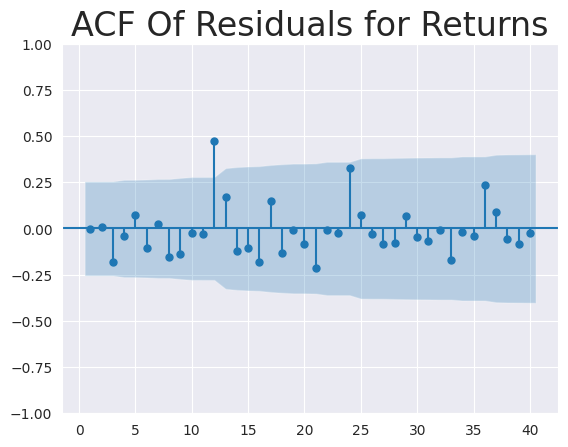

In [ ]:
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

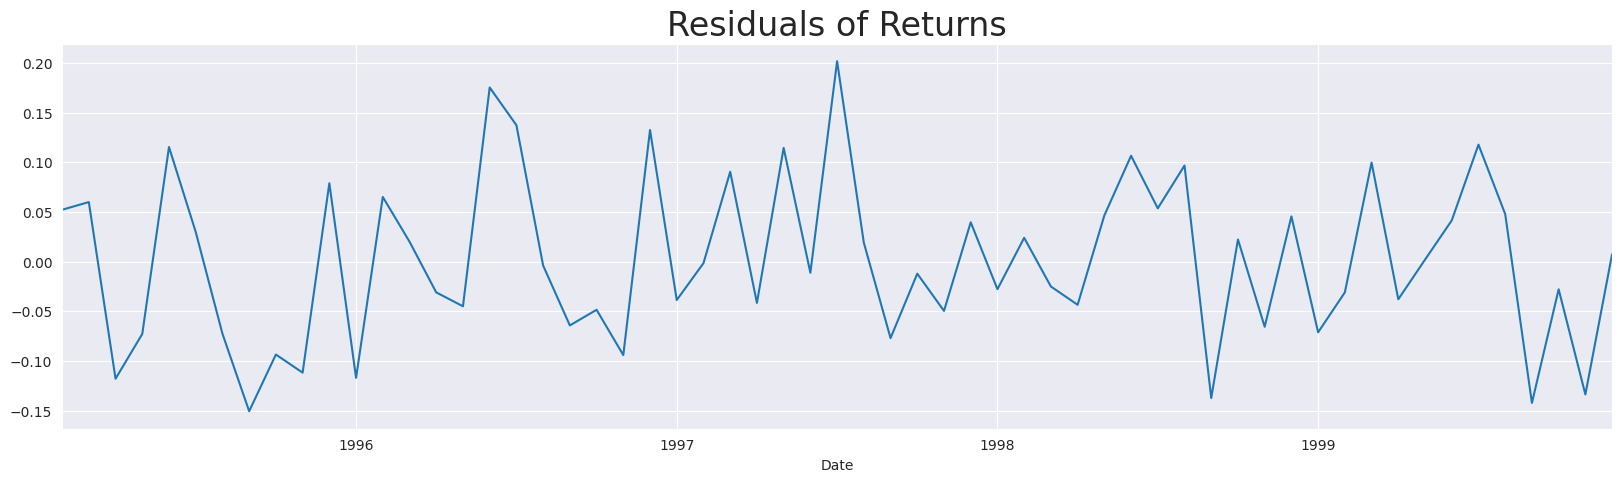

In [ ]:
model_residual.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

In [ ]:
# We are only passing the Box Cox because the ARIMAX will perform the differencing internally
# seasonal_order P=1, Q=1, D=1 and m=12
# m=12 . Because the seasonality is monthly.

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit= model.fit()
y_hat_sarima = data_boxcox_diff.copy()

In [ ]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

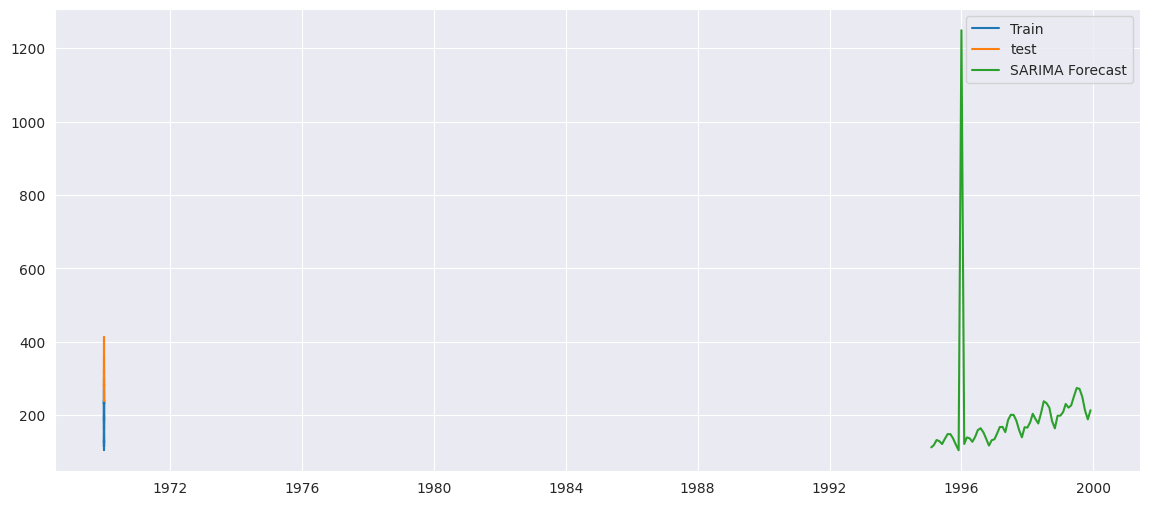

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_data.index, train_data['Passengers'], label='Train') # Plot index as x-axis and 'Passengers' as y-axis
plt.plot(test_data.index, test_data['Passengers'], label='test') # Plot index as x-axis and 'Passengers' as y-axis
plt.plot(y_hat_sarima['sarima_forecast'][test_data.index.min():], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
model_residual = model_fit.resid
model_residual.mean()

0.044753698912792156

In [ ]:
adf_test(model_residual)

Reject the null hypothesis
Data is stationary


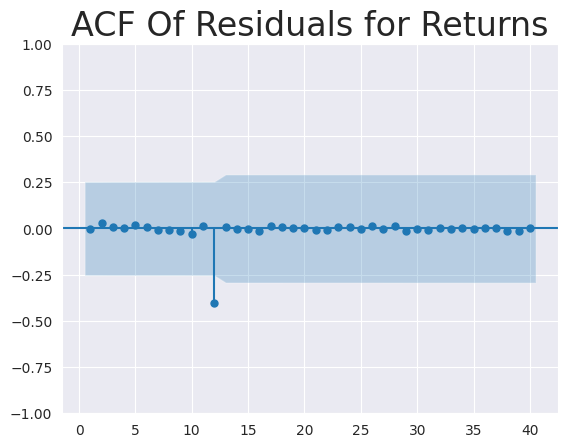

In [ ]:
plot_acf(model_residual, zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

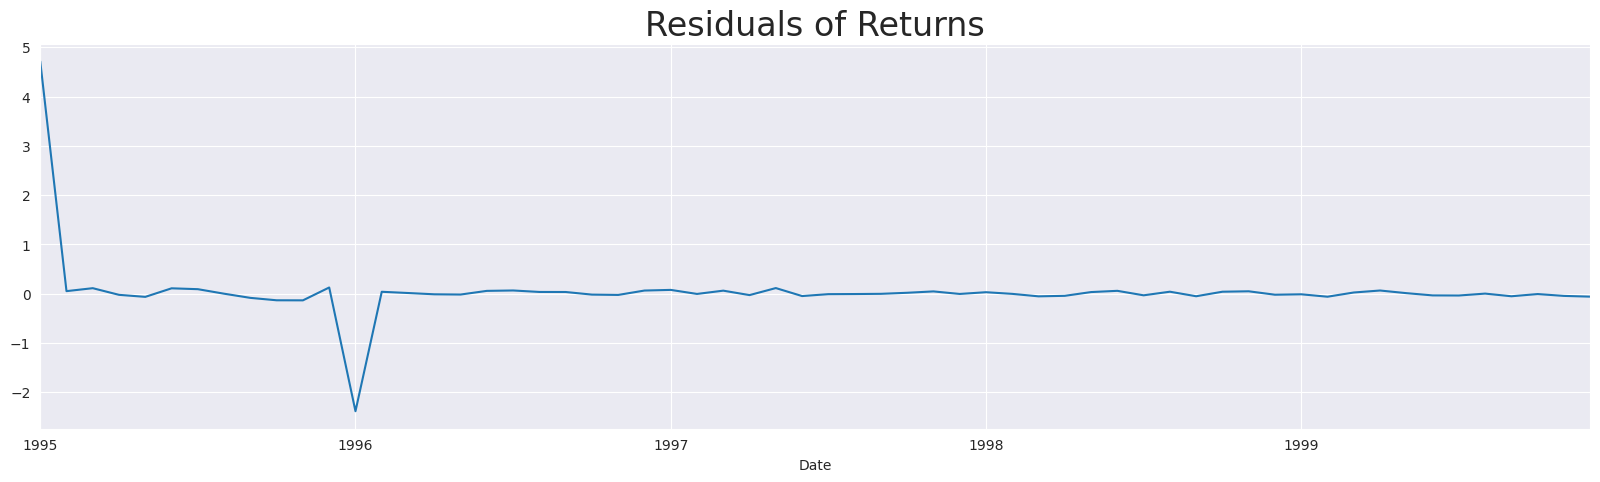

In [ ]:
model_residual.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

In [ ]:
#Compareing the results

Evaluation = {"Models":pd.Series(["Simple_Exponential","Double_Exponential","Triple_Exp_additive","Triple_Exp_mul_ad","Triple_Exp_ad_mul"\
                                  ,"Triple_Exp_multiplicative","ARIMA","SARIMA"]),\
        "MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad_texp,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp,mape_sarima]),\
        "RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad_texp,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp,rmse_ARIMA])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)
table_evaluation

Models    MAPE(%)  RMSE_Values
0  Triple_Exp_multiplicative   6.262059    23.457627
1          Triple_Exp_ad_mul   5.966717    26.441409
2          Triple_Exp_mul_ad   9.375576    33.878137
3        Triple_Exp_additive   8.724207    37.732518
4         Double_Exponential  11.380415    46.186435
5         Simple_Exponential  14.717179    66.155121
6                      ARIMA        NaN          NaN
7                     SARIMA        NaN          NaN

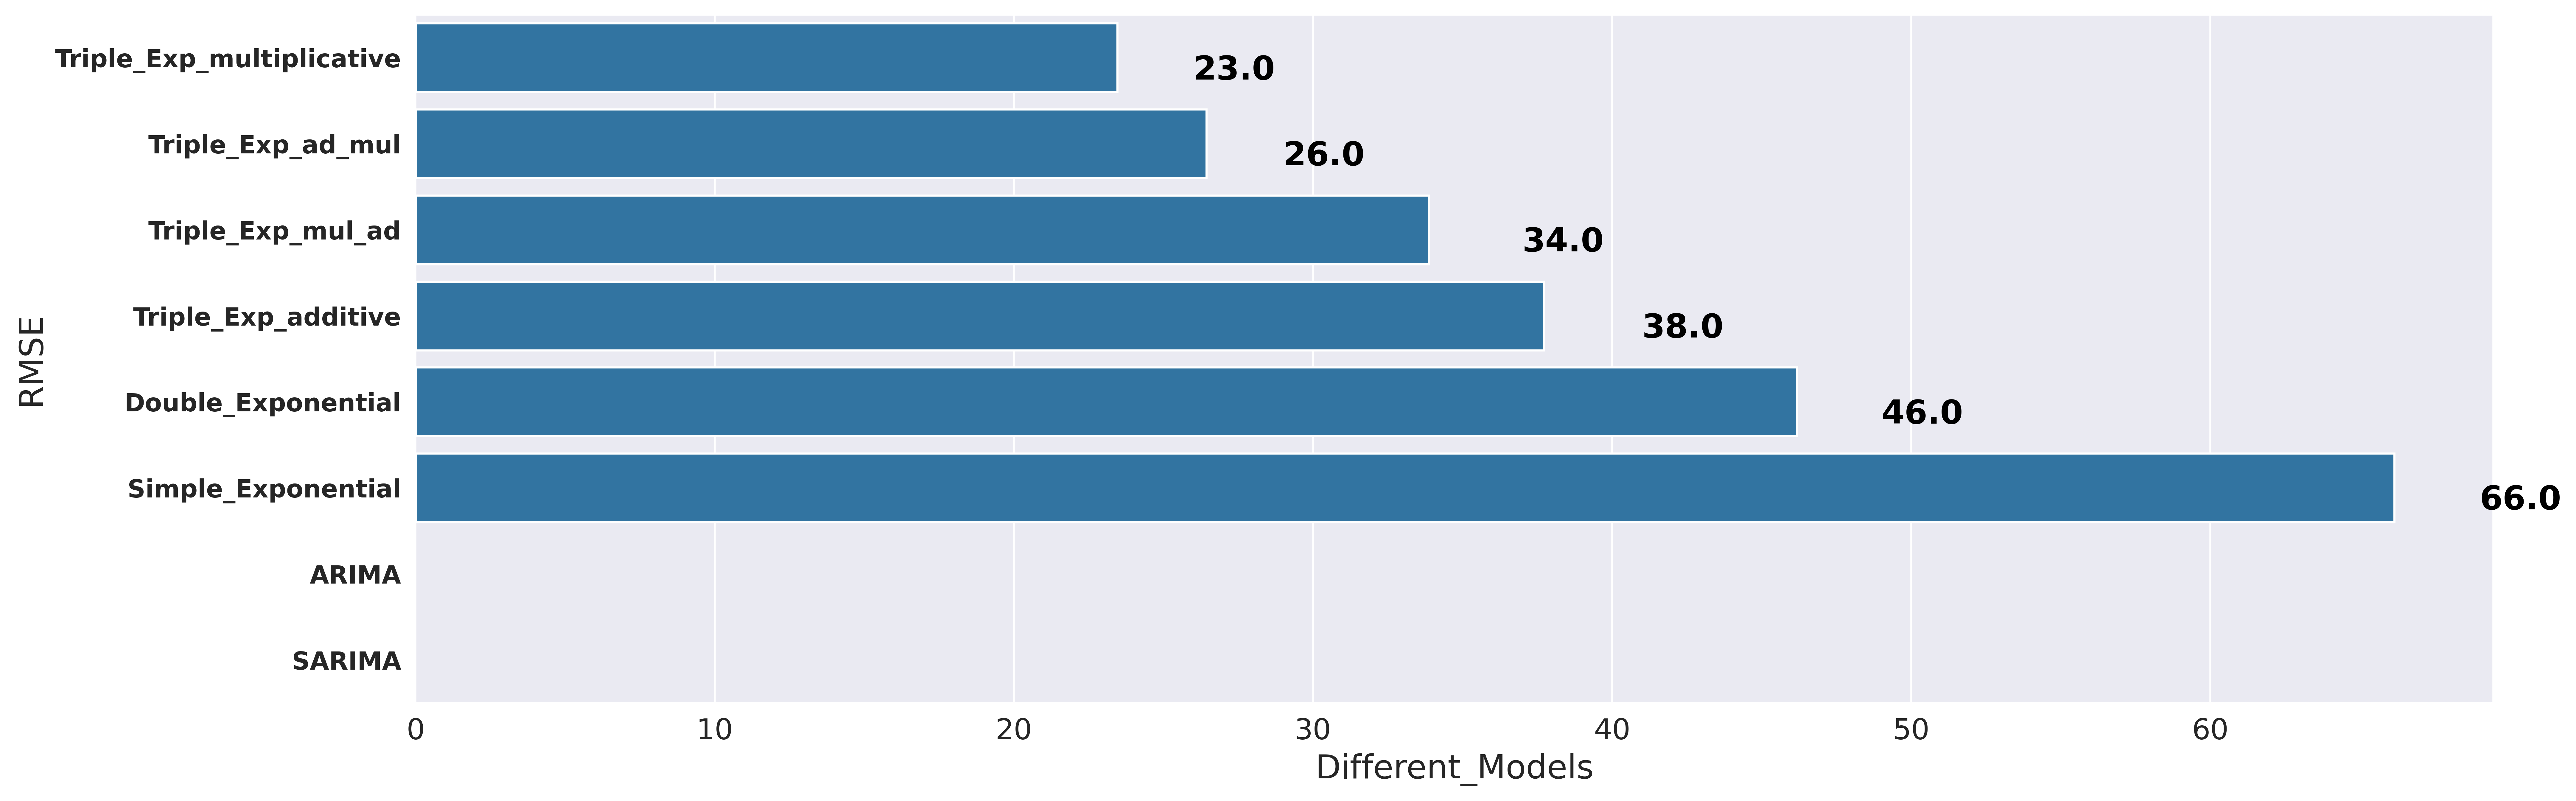

In [ ]:
f, axe = plt.subplots(1,1, figsize=(18,6), dpi=500)
sns.barplot(x='RMSE_Values', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=14)


for i, v in enumerate(np.round(table_evaluation.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize= 16)

plt.show()

In [ ]:
cocacola = df1.copy()
cocacola.reset_index(inplace=True)
cocacola['t'] = np.arange(1,len(cocacola)+1)
cocacola['t_squared'] = np.square(cocacola.t)
cocacola["month"] = cocacola.Date.dt.strftime("%b") # month extraction
cocacola["year"] = cocacola.Date.dt.strftime("%Y") # year extraction
months = pd.get_dummies(cocacola['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
cocacola = pd.concat([cocacola,months],axis=1)
cocacola['log_passengers'] = np.log(cocacola['Passengers'])
cocacola

Date  Passengers   t  t_squared month  year  Jan  Feb  Mar  Apr  May  \
0  1995-01-01         112   1          1   Jan  1995    1    0    0    0    0   
1  1995-02-01         118   2          4   Feb  1995    0    1    0    0    0   
2  1995-03-01         132   3          9   Mar  1995    0    0    1    0    0   
3  1995-04-01         129   4         16   Apr  1995    0    0    0    1    0   
4  1995-05-01         121   5         25   May  1995    0    0    0    0    1   
5  1995-06-01         135   6         36   Jun  1995    0    0    0    0    0   
6  1995-07-01         148   7         49   Jul  1995    0    0    0    0    0   
7  1995-08-01         148   8         64   Aug  1995    0    0    0    0    0   
8  1995-09-01         136   9         81   Sep  1995    0    0    0    0    0   
9  1995-10-01         119  10        100   Oct  1995    0    0    0    0    0   
10 1995-11-01         104  11        121   Nov  1995    0    0    0    0    0   
11 1995-12-01         118  12        144   Dec  1995    0    0    0    0    0   
12 1996-01-01         115  13        169   Jan  1996    1    0    0    0    0   
13 1996-02-01         126  14        196   Feb  1996    0    1    0    0    0   
14 1996-03-01         141  15        225   Mar  1996    0    0    1    0    0   
15 1996-04-01         135  16        256   Apr  1996    0    0    0    1    0   
16 1996-05-01         125  17        289   May  1996    0    0    0    0    1   
17 1996-06-01         149  18        324   Jun  1996    0    0    0    0    0   
18 1996-07-01         170  19        361   Jul  1996    0    0    0    0    0   
19 1996-08-01         170  20        400   Aug  1996    0    0    0    0    0   
20 1996-09-01         158  21        441   Sep  1996    0    0    0    0    0   
21 1996-10-01         133  22        484   Oct  1996    0    0    0    0    0   
22 1996-11-01         114  23        529   Nov  1996    0    0    0    0    0   
23 1996-12-01         140  24        576   Dec  1996    0    0    0    0    0   
24 1997-01-01         145  25        625   Jan  1997    1    0    0    0    0   
25 1997-02-01         150  26        676   Feb  1997    0    1    0    0    0   
26 1997-03-01         178  27        729   Mar  1997    0    0    1    0    0   
27 1997-04-01         163  28        784   Apr  1997    0    0    0    1    0   
28 1997-05-01         172  29        841   May  1997    0    0    0    0    1   
29 1997-06-01         178  30        900   Jun  1997    0    0    0    0    0   
30 1997-07-01         199  31        961   Jul  1997    0    0    0    0    0   
31 1997-08-01         199  32       1024   Aug  1997    0    0    0    0    0   
32 1997-09-01         184  33       1089   Sep  1997    0    0    0    0    0   
33 1997-10-01         162  34       1156   Oct  1997    0    0    0    0    0   
34 1997-11-01         146  35       1225   Nov  1997    0    0    0    0    0   
35 1997-12-01         166  36       1296   Dec  1997    0    0    0    0    0   
36 1998-01-01         171  37       1369   Jan  1998    1    0    0    0    0   
37 1998-02-01         180  38       1444   Feb  1998    0    1    0    0    0   
38 1998-03-01         193  39       1521   Mar  1998    0    0    1    0    0   
39 1998-04-01         181  40       1600   Apr  1998    0    0    0    1    0   
40 1998-05-01         183  41       1681   May  1998    0    0    0    0    1   
41 1998-06-01         218  42       1764   Jun  1998    0    0    0    0    0   
42 1998-07-01         230  43       1849   Jul  1998    0    0    0    0    0   
43 1998-08-01         242  44       1936   Aug  1998    0    0    0    0    0   
44 1998-09-01         209  45       2025   Sep  1998    0    0    0    0    0   
45 1998-10-01         191  46       2116   Oct  1998    0    0    0    0    0   
46 1998-11-01         172  47       2209   Nov  1998    0    0    0    0    0   
47 1998-12-01         194  48       2304   Dec  1998    0    0    0    0    0   
48 1999-01-01         196  49       2401

In [ ]:
train_data = cocacola.iloc[:size]
test_data = cocacola.iloc[size:]

In [ ]:
train_data

Date  Passengers   t  t_squared month  year  Jan  Feb  Mar  Apr  May  \
0  1995-01-01         112   1          1   Jan  1995    1    0    0    0    0   
1  1995-02-01         118   2          4   Feb  1995    0    1    0    0    0   
2  1995-03-01         132   3          9   Mar  1995    0    0    1    0    0   
3  1995-04-01         129   4         16   Apr  1995    0    0    0    1    0   
4  1995-05-01         121   5         25   May  1995    0    0    0    0    1   
5  1995-06-01         135   6         36   Jun  1995    0    0    0    0    0   
6  1995-07-01         148   7         49   Jul  1995    0    0    0    0    0   
7  1995-08-01         148   8         64   Aug  1995    0    0    0    0    0   
8  1995-09-01         136   9         81   Sep  1995    0    0    0    0    0   
9  1995-10-01         119  10        100   Oct  1995    0    0    0    0    0   
10 1995-11-01         104  11        121   Nov  1995    0    0    0    0    0   
11 1995-12-01         118  12        144   Dec  1995    0    0    0    0    0   
12 1996-01-01         115  13        169   Jan  1996    1    0    0    0    0   
13 1996-02-01         126  14        196   Feb  1996    0    1    0    0    0   
14 1996-03-01         141  15        225   Mar  1996    0    0    1    0    0   
15 1996-04-01         135  16        256   Apr  1996    0    0    0    1    0   
16 1996-05-01         125  17        289   May  1996    0    0    0    0    1   
17 1996-06-01         149  18        324   Jun  1996    0    0    0    0    0   
18 1996-07-01         170  19        361   Jul  1996    0    0    0    0    0   
19 1996-08-01         170  20        400   Aug  1996    0    0    0    0    0   
20 1996-09-01         158  21        441   Sep  1996    0    0    0    0    0   
21 1996-10-01         133  22        484   Oct  1996    0    0    0    0    0   
22 1996-11-01         114  23        529   Nov  1996    0    0    0    0    0   
23 1996-12-01         140  24        576   Dec  1996    0    0    0    0    0   
24 1997-01-01         145  25        625   Jan  1997    1    0    0    0    0   
25 1997-02-01         150  26        676   Feb  1997    0    1    0    0    0   
26 1997-03-01         178  27        729   Mar  1997    0    0    1    0    0   
27 1997-04-01         163  28        784   Apr  1997    0    0    0    1    0   
28 1997-05-01         172  29        841   May  1997    0    0    0    0    1   
29 1997-06-01         178  30        900   Jun  1997    0    0    0    0    0   
30 1997-07-01         199  31        961   Jul  1997    0    0    0    0    0   
31 1997-08-01         199  32       1024   Aug  1997    0    0    0    0    0   
32 1997-09-01         184  33       1089   Sep  1997    0    0    0    0    0   
33 1997-10-01         162  34       1156   Oct  1997    0    0    0    0    0   
34 1997-11-01         146  35       1225   Nov  1997    0    0    0    0    0   
35 1997-12-01         166  36       1296   Dec  1997    0    0    0    0    0   
36 1998-01-01         171  37       1369   Jan  1998    1    0    0    0    0   
37 1998-02-01         180  38       1444   Feb  1998    0    1    0    0    0   
38 1998-03-01         193  39       1521   Mar  1998    0    0    1    0    0   
39 1998-04-01         181  40       1600   Apr  1998    0    0    0    1    0   
40 1998-05-01         183  41       1681   May  1998    0    0    0    0    1   
41 1998-06-01         218  42       1764   Jun  1998    0    0    0    0    0   
42 1998-07-01         230  43       1849   Jul  1998    0    0    0    0    0   
43 1998-08-01         242  44       1936   Aug  1998    0    0    0    0    0   
44 1998-09-01         209  45       2025   Sep  1998    0    0    0    0    0   
45 1998-10-01         191  46       2116   Oct  1998    0    0    0    0    0   
46 1998-11-01         172  47       2209   Nov  1998    0    0    0    0    0   
47 1998-12-01         194  48       2304   Dec  1998    0    0    0    0    0   
48 1999-01-01         196  49       2401

In [ ]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     167.4
Date:                Sun, 14 Jul 2024   Prob (F-statistic):           9.67e-19
Time:                        15:09:53   Log-Likelihood:                -267.85
No. Observations:                  60   AIC:                             539.7
Df Residuals:                      58   BIC:                             543.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.8237      5.589     19.472      0.000      97.637     120.011
t              2.0615      0.159     12.937      0.000       1.743       2.380
==============================================================================
Omnibus:                        0.137   Durbin-Watson:                   0.662
Prob(Omnibus):                  0.934   Jarque-Bera (JB):                0.337
Skew:                           0.028   Prob(JB):                        0.845
Kurtosis:                       2.637   Cond. No.                         71.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     182.5
Date:                Sun, 14 Jul 2024   Prob (F-statistic):           1.45e-19
Time:                        15:10:38   Log-Likelihood:                 43.022
No. Observations:                  60   AIC:                            -82.04
Df Residuals:                      58   BIC:                            -77.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7478      0.031    151.135      0.000       4.685       4.811
t              0.0121      0.001     13.511      0.000       0.010       0.014
==============================================================================
Omnibus:                        1.667   Durbin-Watson:                   0.715
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.630
Skew:                          -0.321   Prob(JB):                        0.443
Kurtosis:                       2.510   Cond. No.                         71.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     83.51
Date:                Sun, 14 Jul 2024   Prob (F-statistic):           1.15e-17
Time:                        15:11:04   Log-Likelihood:                -267.51
No. Observations:                  60   AIC:                             541.0
Df Residuals:                      57   BIC:                             547.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.0619      8.589     13.281      0.000      96.864     131.260
t              1.5546      0.650      2.393      0.020       0.254       2.856
t_squared      0.0083      0.010      0.805      0.424      -0.012       0.029
==============================================================================
Omnibus:                        0.037   Durbin-Watson:                   0.671
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.147
Skew:                          -0.055   Prob(JB):                        0.929
Kurtosis:                       2.785   Cond. No.                     5.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.169
Date:                Sun, 14 Jul 2024   Prob (F-statistic):              0.333
Time:                        15:11:35   Log-Likelihood:                -301.45
No. Observations:                  60   AIC:                             626.9
Df Residuals:                      48   BIC:                             652.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    158.4923      4.902     32.331      0.000     148.636     168.349
Jan          -10.6923     17.618     -0.607      0.547     -46.116      24.731
Feb           -4.4923     17.618     -0.255      0.800     -39.916      30.931
Mar           17.5077     17.618      0.994      0.325     -17.916      52.931
Apr           10.1077     17.618      0.574      0.569     -25.316      45.531
May            7.5077     17.618      0.426      0.672     -27.916      42.931
Jun           26.1077     17.618      1.482      0.145      -9.316      61.531
Jul           43.7077     17.618      2.481      0.017       8.284      79.131
Aug           47.7077     17.618      2.708      0.009      12.284      83.131
Sep           26.3077     17.618      1.493      0.142      -9.116      61.731
Oct            4.7077     17.618      0.267      0.790     -30.716      40.131
Nov          -15.2923     17.618     -0.868      0.390     -50.716      20.131
Dec            5.3077     17.618      0.301      0.765     -30.116      40.731
==============================================================================
Omnibus:                       17.848   Durbin-Watson:                   0.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.249
Skew:                           0.222   Prob(JB):                        0.119
Kurtosis:                       1.774   Cond. No.                     9.07e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.9e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
add_sea_Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     105.7
Date:                Sun, 14 Jul 2024   Prob (F-statistic):           1.02e-29
Time:                        15:12:09   Log-Likelihood:                -205.69
No. Observations:                  60   AIC:                             439.4
Df Residuals:                      46   BIC:                             468.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    104.9658      3.172     33.096      0.000      98.582     111.350
t              1.4807      0.259      5.727      0.000       0.960       2.001
t_squared      0.0104      0.004      2.540      0.015       0.002       0.019
Jan           -3.7023      3.655     -1.013      0.316     -11.060       3.656
Feb            0.4853      3.654      0.133      0.895      -6.870       7.841
Mar           20.4520      3.654      5.597      0.000      13.097      27.807
Apr           10.9979      3.654      3.009      0.004       3.642      18.354
May            6.3229      3.656      1.730      0.090      -1.036      13.682
Jun           22.8271      3.658      6.240      0.000      15.464      30.190
Jul           38.3104      3.661     10.465      0.000      30.942      45.679
Aug           40.1729      3.664     10.964      0.000      32.798      47.548
Sep           16.6146      3.668      4.530      0.000       9.231      23.998
Oct           -7.1647      3.673     -1.951      0.057     -14.557       0.228
Nov          -29.3647      3.678     -7.983      0.000     -36.769     -21.961
Dec          -10.9856      3.685     -2.981      0.005     -18.403      -3.568
==============================================================================
Omnibus:                        2.308   Durbin-Watson:                   0.847
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                2.097
Skew:                          -0.451   Prob(JB):                        0.351
Kurtosis:                       2.843   Cond. No.                     1.53e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.96e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
Mul_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.149
Date:                Sun, 14 Jul 2024   Prob (F-statistic):              0.347
Time:                        15:13:02   Log-Likelihood:                 7.3584
No. Observations:                  60   AIC:                             9.283
Df Residuals:                      48   BIC:                             34.42
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7233      0.029    165.624      0.000       4.666       4.781
Jan            0.2487      0.102      2.427      0.019       0.043       0.455
Feb            0.2945      0.102      2.873      0.006       0.088       0.501
Mar            0.4247      0.102      4.144      0.000       0.219       0.631
Apr            0.3801      0.102      3.709      0.001       0.174       0.586
May            0.3597      0.102      3.510      0.001       0.154       0.566
Jun            0.4704      0.102      4.590      0.000       0.264       0.677
Jul            0.5648      0.102      5.511      0.000       0.359       0.771
Aug            0.5809      0.102      5.668      0.000       0.375       0.787
Sep            0.4769      0.102      4.653      0.000       0.271       0.683
Oct            0.3490      0.102      3.405      0.001       0.143       0.555
Nov            0.2177      0.102      2.124      0.039       0.012       0.424
Dec            0.3558      0.102      3.472      0.001       0.150       0.562
==============================================================================
Omnibus:                       39.550   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.003
Skew:                           0.023   Prob(JB):                       0.0820
Kurtosis:                       1.586   Cond. No.                     9.07e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.9e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
Mul_Add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     167.0
Date:                Sun, 14 Jul 2024   Prob (F-statistic):           2.81e-34
Time:                        15:13:25   Log-Likelihood:                 113.62
No. Observations:                  60   AIC:                            -201.2
Df Residuals:                      47   BIC:                            -174.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3733      0.010    433.640      0.000       4.353       4.394
t              0.0124      0.000     39.705      0.000       0.012       0.013
Jan            0.2879      0.018     16.312      0.000       0.252       0.323
Feb            0.3212      0.018     18.215      0.000       0.286       0.357
Mar            0.4391      0.018     24.908      0.000       0.404       0.475
Apr            0.3820      0.018     21.678      0.000       0.347       0.417
May            0.3492      0.018     19.811      0.000       0.314       0.385
Jun            0.4475      0.018     25.379      0.000       0.412       0.483
Jul            0.5294      0.018     30.003      0.000       0.494       0.565
Aug            0.5331      0.018     30.182      0.000       0.498       0.569
Sep            0.4166      0.018     23.553      0.000       0.381       0.452
Oct            0.2763      0.018     15.595      0.000       0.241       0.312
Nov            0.1326      0.018      7.468      0.000       0.097       0.168
Dec            0.2583      0.018     14.517      0.000       0.223       0.294
==============================================================================
Omnibus:                        2.747   Durbin-Watson:                   0.940
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                2.294
Skew:                          -0.479   Prob(JB):                        0.318
Kurtosis:                       3.015   Cond. No.                     4.48e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.69e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

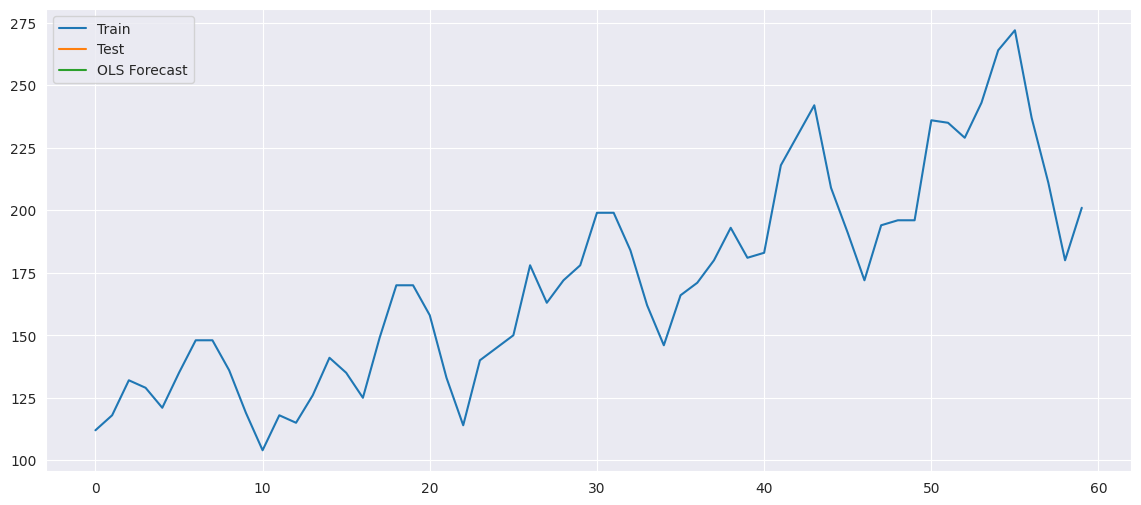

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_data['Passengers'], label='Train')
plt.plot(test_data['Passengers'], label='Test')
plt.plot(np.exp(pred_Mult_add_sea), label='OLS Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
#Compare the results

data = {"Models":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)

In [ ]:
e = table_rmse.append(table_evaluation)
e.drop('MAPE(%)', axis=1, inplace=True)
e.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)

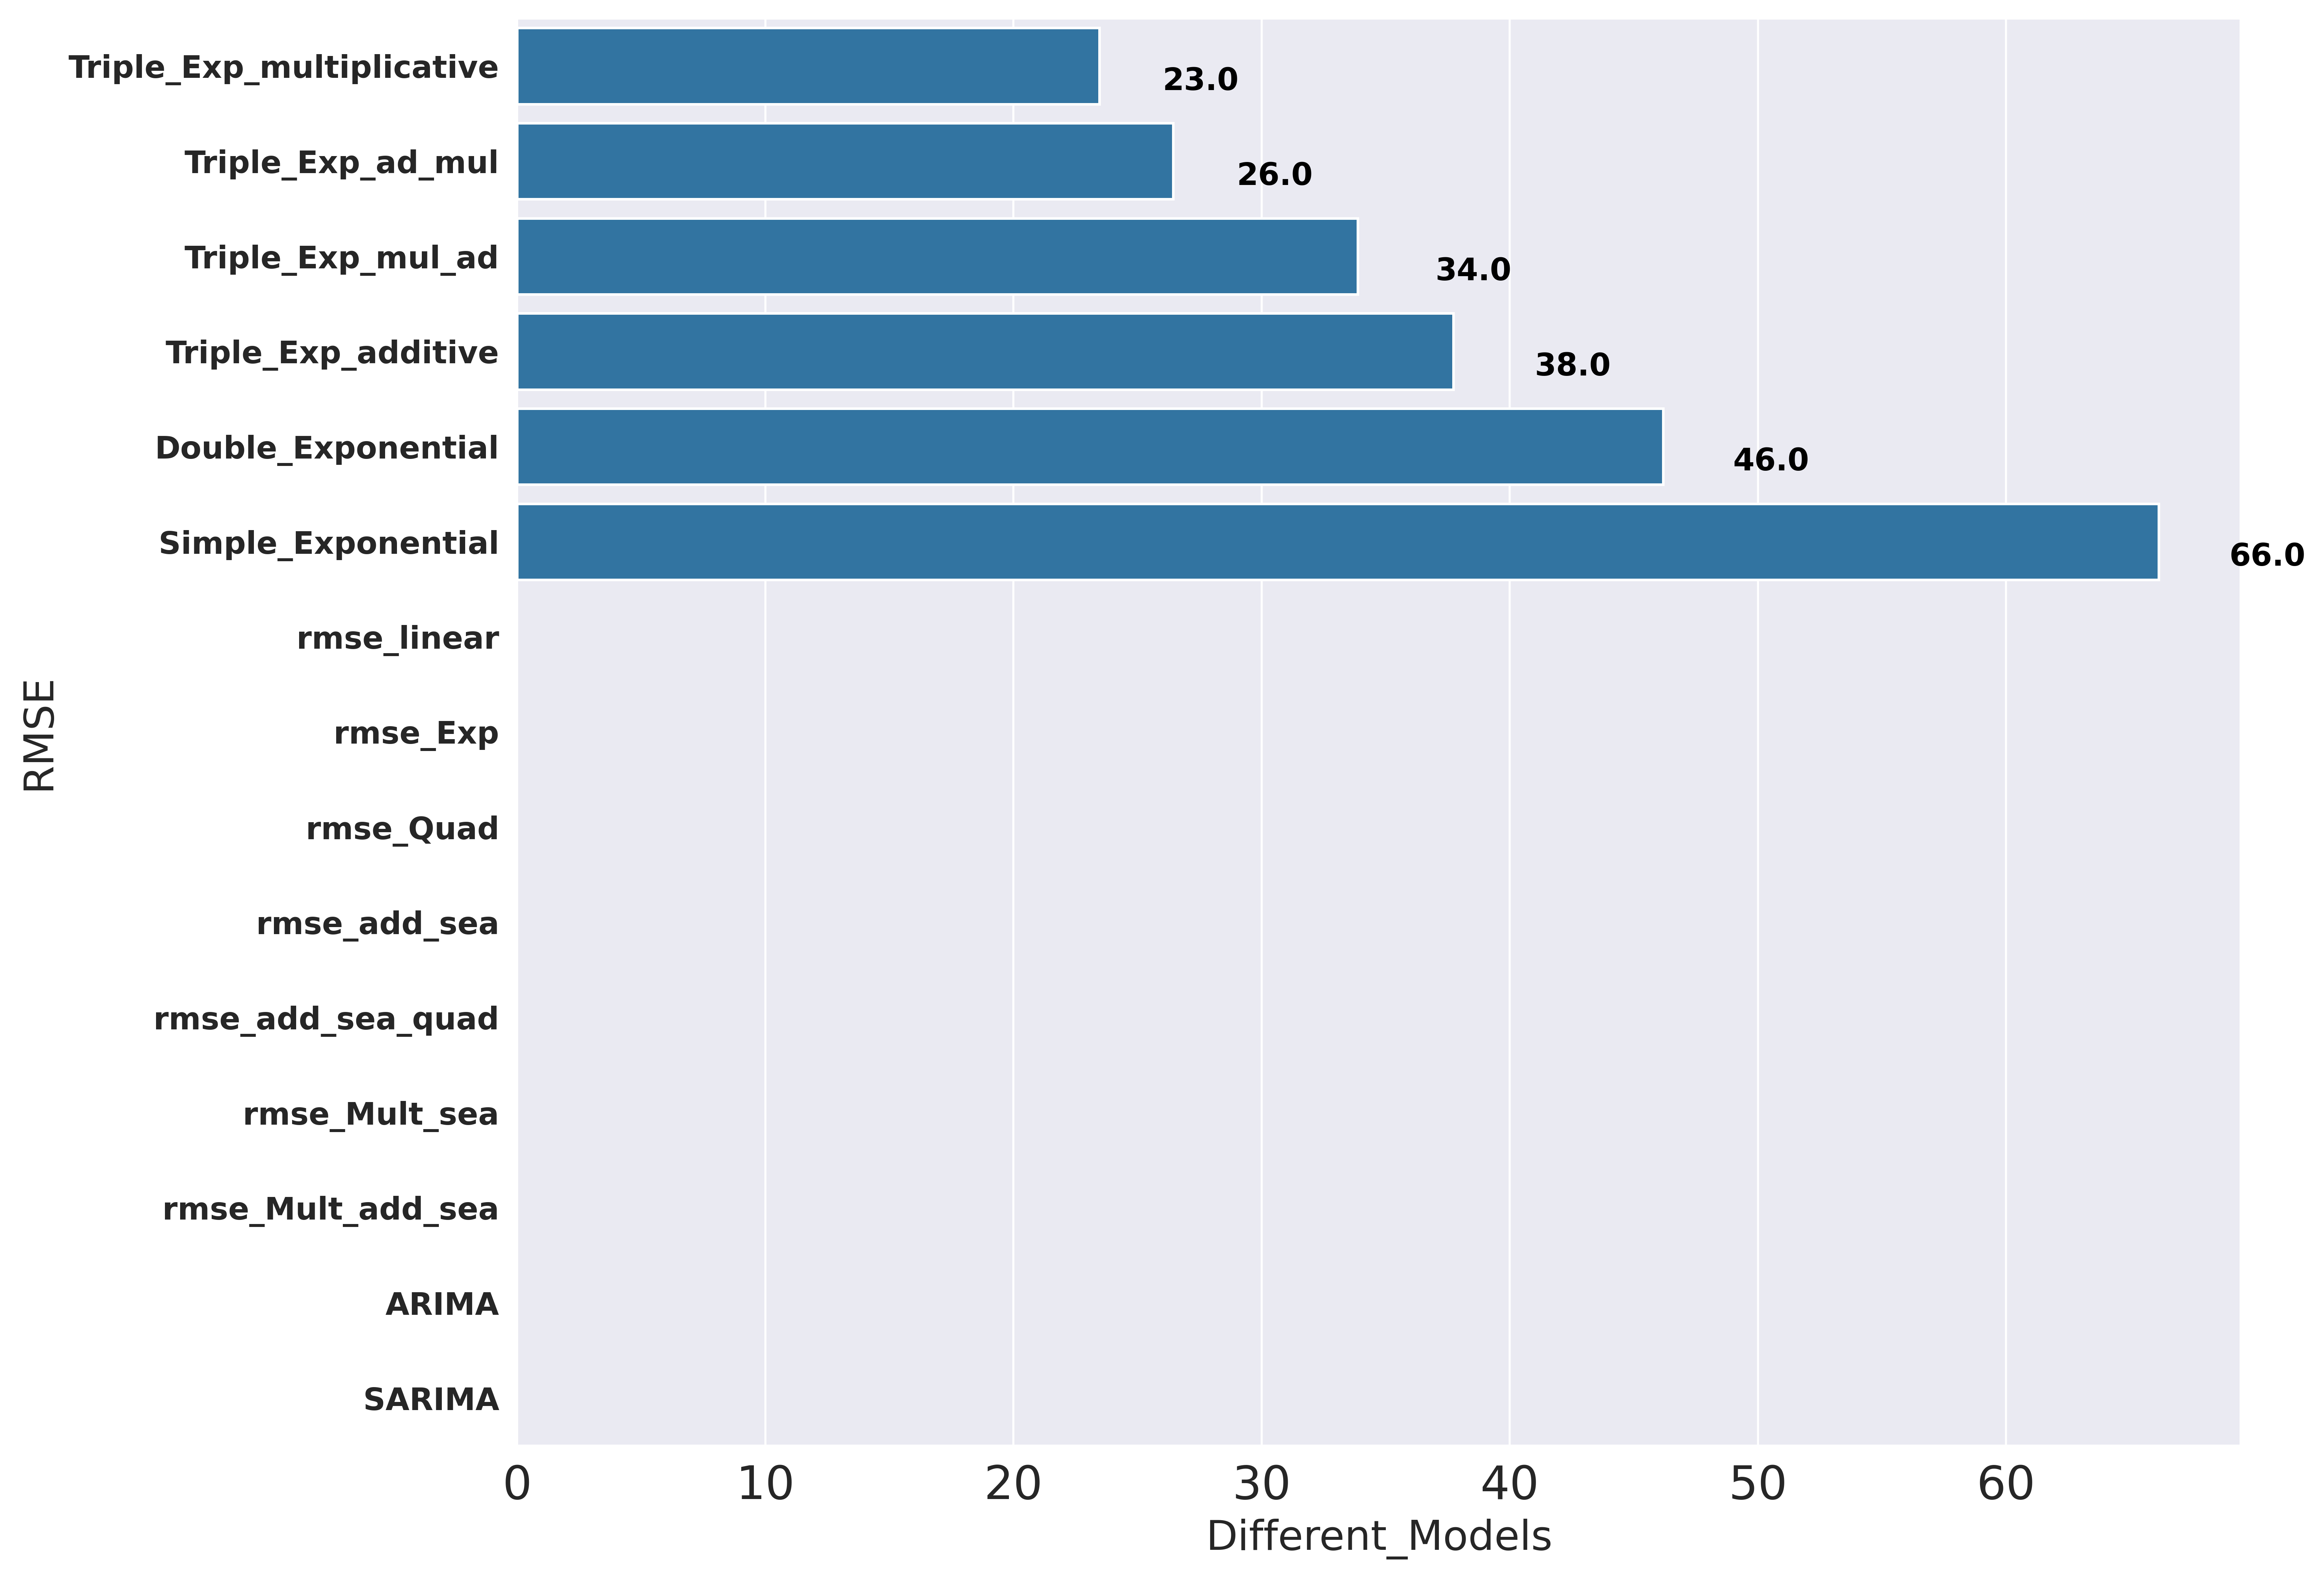

In [ ]:
f, axe = plt.subplots(1,1, figsize=(12,10), dpi=500)
sns.barplot(x='RMSE_Values', y='Models', data=e, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=18)

for i, v in enumerate(np.round(e.RMSE_Values.values,0)):
    axe.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold', fontsize= 12)

plt.show()